# Project 17: Final Project


## Overview

### Purpose

To forecast Interconnect's churn of clients.

#### Background
The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

#### Interconnect's services
Interconnect mainly provides two types of services:

Landline communication. The telephone can be connected to several lines simultaneously.
Internet. The network can be set up via a telephone line (DSL, digital subscriber line) or through a fiber optic cable.
Some other services the company provides include:

Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity)
A dedicated technical support line (TechSupport)
Cloud file storage and data backup (OnlineBackup)
TV streaming (StreamingTV) and a movie directory (StreamingMovies)
The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

#### Data Description
The data consists of files obtained from different sources:

contract.csv — contract information
personal.csv — the client's personal data
internet.csv — information about Internet services
phone.csv — information about telephone services
In each file, the column customerID contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.

#### Overview of Process & Current Status

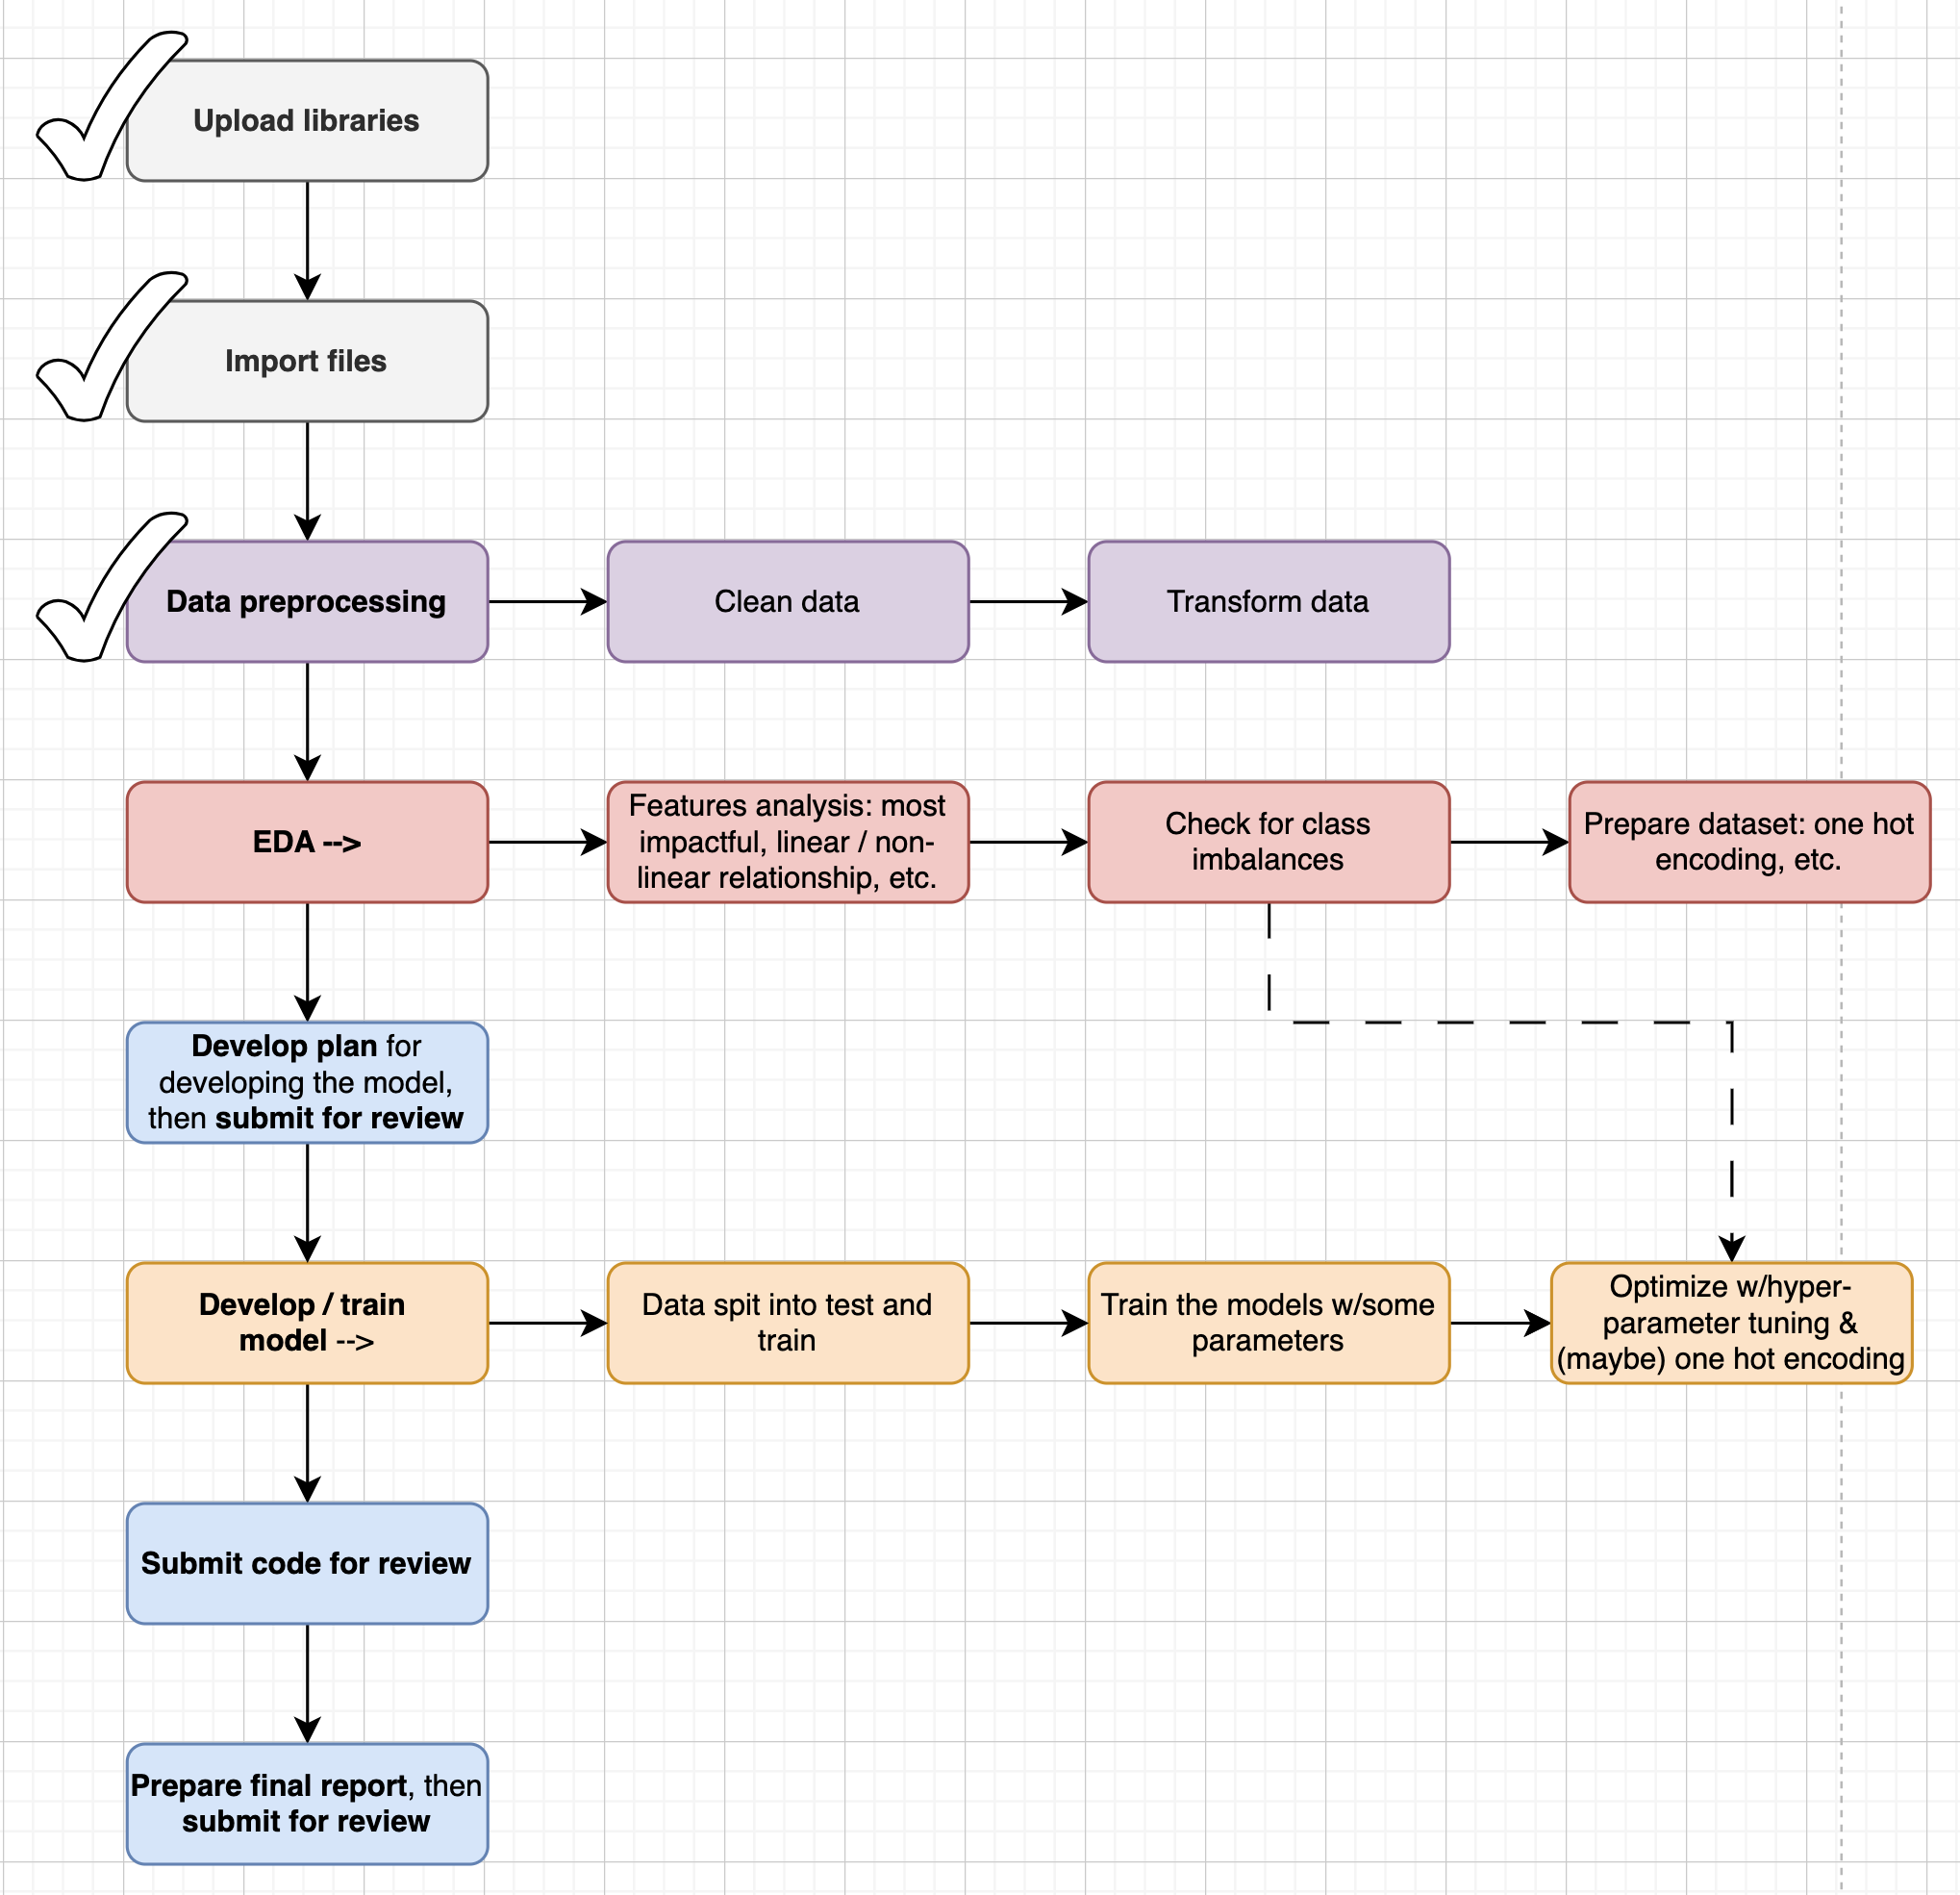



## Load Data & Libraries


In [3]:
# Import the libraries

import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# # Define the folder path

# folder_path = './datasets/final_provider/'

# #Specify file names
# file_contract = 'contract.csv'
# file_internet = 'internet.csv'
# file_personal = 'personal.csv'
# file_phone = 'phone.csv'

# # Load .csv files into a pandas DataFrame
# data_contract = (f'{folder_path}{file_contract}')
# data_internet = (f'{folder_path}{file_internet}')
# data_personal = (f'{folder_path}{file_personal}')
# data_phone = (f'{folder_path}{file_phone}')

# # Display data
# print("Contract Data:")
# print(data_contract.head())

In [4]:
# Load .csv files into pandas DataFrames
data_contract = pd.read_csv('contract.csv')
data_internet = pd.read_csv('internet.csv')
data_personal = pd.read_csv('personal.csv')
data_phone = pd.read_csv('phone.csv')

## Data Pre-processing

### Review Data

In [5]:
# Define function to review data sets

from IPython.display import display

def review_data(data):
    print("Preview of Data:")
    display(data.head())  # Display the first 5 rows in table format

    print("\nDataFrame Info:")
    display(data.info())  # Display summary information

    print("\nStatistical Summary:")
    display(data.describe(include='all'))  # Summary for all column types

    print("\nMissing Values Per Column:")
    display(data.isnull().sum())  # Count of missing values per column

    print("\nNumber of Duplicate Rows:")
    display(data.duplicated().sum())  # Count of duplicate rows

    print("\nData Types:")
    display(data.dtypes)  # Data types of each column

In [6]:
print("Internet data")

review_data(data_contract)

Internet data
Preview of Data:


customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None


Statistical Summary:


customerID   BeginDate EndDate            Type PaperlessBilling  \
count         7043        7043    7043            7043             7043   
unique        7043          77       5               3                2   
top     7590-VHVEG  2014-02-01      No  Month-to-month              Yes   
freq             1         366    5174            3875             4171   
mean           NaN         NaN     NaN             NaN              NaN   
std            NaN         NaN     NaN             NaN              NaN   
min            NaN         NaN     NaN             NaN              NaN   
25%            NaN         NaN     NaN             NaN              NaN   
50%            NaN         NaN     NaN             NaN              NaN   
75%            NaN         NaN     NaN             NaN              NaN   
max            NaN         NaN     NaN             NaN              NaN   

           PaymentMethod  MonthlyCharges TotalCharges  
count               7043     7043.000000         7043  
unique                 4             NaN         6531  
top     Electronic check             NaN               
freq                2365             NaN           11  
mean                 NaN       64.761692          NaN  
std                  NaN       30.090047          NaN  
min                  NaN       18.250000          NaN  
25%                  NaN       35.500000          NaN  
50%                  NaN       70.350000          NaN  
75%                  NaN       89.850000          NaN  
max                  NaN      118.750000          NaN


Missing Values Per Column:


customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


Number of Duplicate Rows:


0


Data Types:


customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [5]:
data_personal['SeniorCitizen'].unique()

data_contract['PaymentMethod'].unique()

data_contract['Type'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

### Clean & Transform Data

#### Clean Data
- Handle missing values (e.g., fill, drop, or impute).
- Remove duplicates.
- Fix incorrect data types.
- Standardize column names.
- Apply transformations (e.g., trimming, case formatting).
- Filter invalid rows.

#### Transform Data
- Encoding categorical variables.
- Scaling or normalizing numeric data.
- Creating new features (e.g., date parts, ratios, etc.).
- Converting formats (e.g., date parsing, string manipulation).
- Aggregation or pivoting (if necessary).
- Filtering or binning data into groups.


##### Action list of data cleaning
- Contract data set
    - Change Begindate column to date type - DONE
    - Chg End Date: - DONE
        - If No, chg to 2/1/2020 - DONE
        - If date, remove time stamps - DONE
        - Chg column to date type - DONE
    - Chg TotalCharges to Float64 datatype - DONE
    - Fill missing values in TotalCharges - DONE
    - Add feature / column "Contract_duration": count of days in between start and end dates & chg to month - DONE
    - Add feature / column "exited": if end date = 2/1/2020, then = 0 = still here; if end date /=, then 1 = left - DONE
    - Add feature / column "automatic_payment": 1 = y "automatic", - = no - DONE
- Combine data sets based on customer ID - DONE
- Addressing missing values - 
- Create Columns: - DONE
    - Internet vs Phone vs Both - DONE

##### Action list of data transformations / preparations / feature for analyses and modeling
- Convert all yes/no columns to 1/0 (int):
    - 'PaperlessBilling'
    - 'Partner'
    - 'Dependents'
    - 'MultipleLines'
    - 'internet_yes'
    - 'OnlineSecurity'
    - 'OnlineBackup'
    - 'DeviceProtection'
    - 'TechSupport'
    - 'StreamingTV'
    - 'StreamingMovies'
- Convert categorical columns w/non-binary values to one-hot encoding or integer mapping:
    - 'PaymentMethod'
    - 'Type'
- Create is_active column in 1/0s (int)

In [9]:
#Change Begindate column to date type
#data_contract['BeginDate'] = pd.to_datetime(data_contract['BeginDate'], format='%Y-%m-%d')

#Chg End Date: If No, chg to 2/1/2020
#data_contract['EndDate'] = data_contract['EndDate'].replace('No','2020-02-01') 

#Chg End Date: Chg column to date type    
#data_contract['EndDate'] = pd.to_datetime(data_contract['EndDate'], format='%Y-%m-%d')

#Chg TotalCharges to Float64 datatype
#data_contract['TotalCharges'] = pd.to_numeric(data_contract['TotalCharges'], errors='coerce')




# Ensure 'BeginDate' is in datetime format
data_contract['BeginDate'] = pd.to_datetime(data_contract['BeginDate'], errors='coerce')

# Replace 'No' with a specific date before converting 'EndDate' to datetime
data_contract['EndDate'] = data_contract['EndDate'].replace({'No': '2020-02-01'})

# Convert 'EndDate' to datetime while handling errors gracefully
data_contract['EndDate'] = pd.to_datetime(data_contract['EndDate'], errors='coerce')

# Convert 'TotalCharges' to float, setting errors to 'coerce' (turns invalid values into NaN)
data_contract['TotalCharges'] = pd.to_numeric(data_contract['TotalCharges'], errors='coerce')




In [10]:
#Add feature / column "Contract_duration": count of days in between start and end dates, THEN by month count
#data_contract['duration_months'] = (((data_contract['EndDate'] - data_contract['BeginDate']).dt.days) / 30).astype(int)
# Ensure 'BeginDate' and 'EndDate' are datetime types
data_contract['BeginDate'] = pd.to_datetime(data_contract['BeginDate'], errors='coerce')
data_contract['EndDate'] = pd.to_datetime(data_contract['EndDate'], errors='coerce')

# Calculate contract duration in months, handling NaT values
data_contract['duration_months'] = ((data_contract['EndDate'] - data_contract['BeginDate']).dt.days / 30).fillna(0).astype(int)


In [11]:
data_contract['TotalCharges'].isna().sum()

11

In [12]:
#Fill missing values within TotalCharges with monthlycharges * duration_months
data_contract['TotalCharges'] = data_contract['TotalCharges'].fillna(data_contract['MonthlyCharges'] * data_contract['duration_months'])






In [13]:
data_contract['TotalCharges'].isna().sum()

0

In [14]:
#Add feature / column "exited": if end date = 2/1/2020, then = 0 = still here; if end date /=, then 1 = left
data_contract['exited'] = (data_contract['EndDate'] != pd.to_datetime('2020-02-01')).astype(int)        #astype(int) changes boolean "false, true" to integer "0,1"

#Add feature / column "automatic_payment": 1 = y "automatic", - = no
data_contract['automatic_pay'] = data_contract['PaymentMethod'].str.contains('automatic').astype(int)

#Add feature / column "phone_yes" to data_phone
data_phone['phone_yes'] = 'yes'

#Add feature / column "internet_yes" to data_internet
data_internet['internet_yes'] = 'yes'

In [15]:
# Combine data sets based on customer ID
from functools import reduce

# List of DataFrames to merge
dataframes = [data_contract, data_personal, data_internet, data_phone]

# Combine data sets based on customer ID
data_merged = reduce(lambda left, right: pd.merge(left, right, on='customerID', how = 'left'), dataframes)




In [16]:
#Create Column: using both internet and phone services

data_merged['internet_phone_yes'] = (data_merged['internet_yes']=='yes') & (data_merged['phone_yes']=='yes' )

In [17]:
#data_merged['internet_phone_yes']==true.sum()

data_merged['internet_phone_yes'].sum()

4835

In [18]:
#Addressing missing values in data_merged
#data_merged.isna().sum()

objectcolumns = data_merged.columns[data_merged.dtypes=='object']

data_merged[objectcolumns] = data_merged[objectcolumns].fillna("no")   # fill "No" in all cells that are objects (dtype=='object')



In [19]:
print("data_merged")

review_data(data_merged)

data_merged
Preview of Data:


customerID  BeginDate    EndDate            Type PaperlessBilling  \
0  7590-VHVEG 2020-01-01 2020-02-01  Month-to-month              Yes   
1  5575-GNVDE 2017-04-01 2020-02-01        One year               No   
2  3668-QPYBK 2019-10-01        NaT  Month-to-month              Yes   
3  7795-CFOCW 2016-05-01 2020-02-01        One year               No   
4  9237-HQITU 2019-09-01        NaT  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  duration_months  \
0           Electronic check           29.85         29.85                1   
1               Mailed check           56.95       1889.50               34   
2               Mailed check           53.85        108.15                0   
3  Bank transfer (automatic)           42.30       1840.75               45   
4           Electronic check           70.70        151.65                0   

   exited  ...  OnlineSecurity OnlineBackup  DeviceProtection TechSupport  \
0       0  ...              No          Yes                No          No   
1       0  ...             Yes           No               Yes          No   
2       1  ...             Yes          Yes                No          No   
3       0  ...             Yes           No               Yes         Yes   
4       1  ...              No           No                No          No   

  StreamingTV StreamingMovies internet_yes MultipleLines phone_yes  \
0          No              No          yes            no        no   
1          No              No          yes            No       yes   
2          No              No          yes            No       yes   
3          No              No          yes            no        no   
4          No              No          yes            No       yes   

  internet_phone_yes  
0              False  
1               True  
2               True  
3              False  
4               True  

[5 rows x 26 columns]


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customerID          7043 non-null   object        
 1   BeginDate           7043 non-null   datetime64[ns]
 2   EndDate             5174 non-null   datetime64[ns]
 3   Type                7043 non-null   object        
 4   PaperlessBilling    7043 non-null   object        
 5   PaymentMethod       7043 non-null   object        
 6   MonthlyCharges      7043 non-null   float64       
 7   TotalCharges        7043 non-null   float64       
 8   duration_months     7043 non-null   int32         
 9   exited              7043 non-null   int32         
 10  automatic_pay       7043 non-null   int32         
 11  gender              7043 non-null   object        
 12  SeniorCitizen       7043 non-null   int64         
 13  Partner             7043 non-nu

None


Statistical Summary:


customerID                      BeginDate  \
count         7043                           7043   
unique        7043                            NaN   
top     7590-VHVEG                            NaN   
freq             1                            NaN   
mean           NaN  2017-04-30 13:01:50.918642688   
min            NaN            2013-10-01 00:00:00   
25%            NaN            2015-06-01 00:00:00   
50%            NaN            2017-09-01 00:00:00   
75%            NaN            2019-04-01 00:00:00   
max            NaN            2020-02-01 00:00:00   
std            NaN                            NaN   

                              EndDate            Type PaperlessBilling  \
count                            5174            7043             7043   
unique                            NaN               3                2   
top                               NaN  Month-to-month              Yes   
freq                              NaN            3875             4171   
mean    2020-02-01 00:00:00.000000256             NaN              NaN   
min               2020-02-01 00:00:00             NaN              NaN   
25%               2020-02-01 00:00:00             NaN              NaN   
50%               2020-02-01 00:00:00             NaN              NaN   
75%               2020-02-01 00:00:00             NaN              NaN   
max               2020-02-01 00:00:00             NaN              NaN   
std                               NaN             NaN              NaN   

           PaymentMethod  MonthlyCharges  TotalCharges  duration_months  \
count               7043     7043.000000   7043.000000      7043.000000   
unique                 4             NaN           NaN              NaN   
top     Electronic check             NaN           NaN              NaN   
freq                2365             NaN           NaN              NaN   
mean                 NaN       64.761692   2279.734304        27.737754   
min                  NaN       18.250000      0.000000         0.000000   
25%                  NaN       35.500000    398.550000         0.000000   
50%                  NaN       70.350000   1394.550000        21.000000   
75%                  NaN       89.850000   3786.600000        53.000000   
max                  NaN      118.750000   8684.800000        73.000000   
std                  NaN       30.090047   2266.794470        26.723899   

             exited  ...  OnlineSecurity OnlineBackup  DeviceProtection  \
count   7043.000000  ...            7043         7043              7043   
unique          NaN  ...               3            3                 3   
top             NaN  ...              No           No                No   
freq            NaN  ...            3498         3088              3095   
mean       0.265370  ...             NaN          NaN               NaN   
min        0.000000  ...             NaN          NaN               NaN   
25%        0.000000  ...             NaN          NaN               NaN   
50%        0.000000  ...             NaN          NaN               NaN   
75%        1.000000  ...             NaN          NaN               NaN   
max        1.000000  ...             NaN          NaN               NaN   
std        0.441561  ...             NaN          NaN               NaN   

       TechSupport StreamingTV StreamingMovies internet_yes MultipleLines  \
count         7043        7043            7043         7043          7043   
unique           3           3               3            2             3   
top             No          No              No          yes            No   
freq          3473        2810            2785         5517          3390   
mean           NaN         NaN             NaN          NaN           NaN   
min            NaN         NaN             NaN          NaN           NaN   
25%            NaN         NaN             NaN          NaN           NaN   
50%            NaN         NaN             NaN          NaN     


Missing Values Per Column:


customerID               0
BeginDate                0
EndDate               1869
Type                     0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
TotalCharges             0
duration_months          0
exited                   0
automatic_pay            0
gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
internet_yes             0
MultipleLines            0
phone_yes                0
internet_phone_yes       0
dtype: int64


Number of Duplicate Rows:


0


Data Types:


customerID                    object
BeginDate             datetime64[ns]
EndDate               datetime64[ns]
Type                          object
PaperlessBilling              object
PaymentMethod                 object
MonthlyCharges               float64
TotalCharges                 float64
duration_months                int32
exited                         int32
automatic_pay                  int32
gender                        object
SeniorCitizen                  int64
Partner                       object
Dependents                    object
InternetService               object
OnlineSecurity                object
OnlineBackup                  object
DeviceProtection              object
TechSupport                   object
StreamingTV                   object
StreamingMovies               object
internet_yes                  object
MultipleLines                 object
phone_yes                     object
internet_phone_yes              bool
dtype: object

In [20]:
import pandas as pd

# Strip spaces and replace the literal string "NaT" with "2020-02-01"
data_merged["EndDate"] = data_merged["EndDate"].astype(str).str.strip().replace("NaT", "2020-02-01")

# Convert the column to datetime format
data_merged["EndDate"] = pd.to_datetime(data_merged["EndDate"], errors="coerce")


In [21]:
import pandas as pd

def clean_enddate(value):
    if pd.isna(value):  # Check if value is NaT, NaN, or None
        return "2020-02-01"  # Replace missing values
    return str(value).strip()  # Remove spaces

# Ensure 'EndDate' column exists before applying function
if "EndDate" in data_merged.columns:
    data_merged["EndDate"] = data_merged["EndDate"].apply(clean_enddate)
else:
    print("Error: 'endDate' column not found!")


In [22]:
import pandas as pd

# Strip spaces and replace the literal string "NaT" with "2020-02-01"
data_merged["EndDate"] = data_merged["EndDate"].astype(str).str.strip().replace("NaT", "2020-02-01")

# Convert the column to datetime format
data_merged["EndDate"] = pd.to_datetime(data_merged["EndDate"], errors="coerce")


In [23]:
print(data_merged.columns)  # Display all column names


Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'duration_months',
       'exited', 'automatic_pay', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'internet_yes', 'MultipleLines', 'phone_yes', 'internet_phone_yes'],
      dtype='object')


In [24]:
data_merged.columns = data_merged.columns.str.strip()  # Remove spaces


In [25]:
for col in data_merged.columns:
    print(f"'{col}'")  # Print each column name clearly


'customerID'
'BeginDate'
'EndDate'
'Type'
'PaperlessBilling'
'PaymentMethod'
'MonthlyCharges'
'TotalCharges'
'duration_months'
'exited'
'automatic_pay'
'gender'
'SeniorCitizen'
'Partner'
'Dependents'
'InternetService'
'OnlineSecurity'
'OnlineBackup'
'DeviceProtection'
'TechSupport'
'StreamingTV'
'StreamingMovies'
'internet_yes'
'MultipleLines'
'phone_yes'
'internet_phone_yes'


In [26]:
data_merged.columns = data_merged.columns.str.strip()  # Remove spaces
data_merged.columns = data_merged.columns.str.lower()  # Convert to lowercase


In [27]:
print(data_merged.columns)


Index(['customerid', 'begindate', 'enddate', 'type', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'duration_months',
       'exited', 'automatic_pay', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'internet_yes', 'multiplelines', 'phone_yes', 'internet_phone_yes'],
      dtype='object')


In [28]:
print(type(data_merged))  # Should be <class 'pandas.core.frame.DataFrame'>
print(data_merged.head())  # Check first few rows


<class 'pandas.core.frame.DataFrame'>
   customerid  begindate    enddate            type paperlessbilling  \
0  7590-VHVEG 2020-01-01 2020-02-01  Month-to-month              Yes   
1  5575-GNVDE 2017-04-01 2020-02-01        One year               No   
2  3668-QPYBK 2019-10-01 2020-02-01  Month-to-month              Yes   
3  7795-CFOCW 2016-05-01 2020-02-01        One year               No   
4  9237-HQITU 2019-09-01 2020-02-01  Month-to-month              Yes   

               paymentmethod  monthlycharges  totalcharges  duration_months  \
0           Electronic check           29.85         29.85                1   
1               Mailed check           56.95       1889.50               34   
2               Mailed check           53.85        108.15                0   
3  Bank transfer (automatic)           42.30       1840.75               45   
4           Electronic check           70.70        151.65                0   

   exited  ...  onlinesecurity onlinebackup  devicepro

In [29]:
# Export to CSV
data_merged.to_csv('data_merged.csv', index=False)  # Set index=False to avoid exporting the index column

print("Dataset successfully exported to output.csv")

Dataset successfully exported to output.csv


In [30]:
data_merged

customerid  begindate    enddate            type paperlessbilling  \
0     7590-VHVEG 2020-01-01 2020-02-01  Month-to-month              Yes   
1     5575-GNVDE 2017-04-01 2020-02-01        One year               No   
2     3668-QPYBK 2019-10-01 2020-02-01  Month-to-month              Yes   
3     7795-CFOCW 2016-05-01 2020-02-01        One year               No   
4     9237-HQITU 2019-09-01 2020-02-01  Month-to-month              Yes   
...          ...        ...        ...             ...              ...   
7038  6840-RESVB 2018-02-01 2020-02-01        One year              Yes   
7039  2234-XADUH 2014-02-01 2020-02-01        One year              Yes   
7040  4801-JZAZL 2019-03-01 2020-02-01  Month-to-month              Yes   
7041  8361-LTMKD 2019-07-01 2020-02-01  Month-to-month              Yes   
7042  3186-AJIEK 2014-08-01 2020-02-01        Two year              Yes   

                  paymentmethod  monthlycharges  totalcharges  \
0              Electronic check           29.85         29.85   
1                  Mailed check           56.95       1889.50   
2                  Mailed check           53.85        108.15   
3     Bank transfer (automatic)           42.30       1840.75   
4              Electronic check           70.70        151.65   
...                         ...             ...           ...   
7038               Mailed check           84.80       1990.50   
7039    Credit card (automatic)          103.20       7362.90   
7040           Electronic check           29.60        346.45   
7041               Mailed check           74.40        306.60   
7042  Bank transfer (automatic)          105.65       6844.50   

      duration_months  exited  ...  onlinesecurity onlinebackup  \
0                   1       0  ...              No          Yes   
1                  34       0  ...             Yes           No   
2                   0       1  ...             Yes          Yes   
3                  45       0  ...             Yes           No   
4                   0       1  ...              No           No   
...               ...     ...  ...             ...          ...   
7038               24       0  ...             Yes           No   
7039               73       0  ...              No          Yes   
7040               11       0  ...             Yes           No   
7041                0       1  ...              No           No   
7042               67       0  ...             Yes           No   

      deviceprotection techsupport streamingtv streamingmovies internet_yes  \
0                   No          No          No              No          yes   
1                  Yes          No          No              No          yes   
2                   No          No          No              No          yes   
3                  Yes         Yes          No              No          yes   
4                   No          No          No              No          yes   
...                ...         ...         ...             ...          ...   
7038               Yes         Yes         Yes             Yes          yes   
7039               Yes          No         Yes             Yes          yes   
7040                No          No          No              No          yes   
7041                No          No          No              No          yes   
7042               Yes         Yes         Yes             Yes          yes   

     multiplelines phone_yes internet_phone_yes  
0               no        no              False  
1               No       yes               True  
2               No       yes               True  
3               no        no              False  
4               No       yes               True  
...            ...       ...                ...  
7038           Yes       yes               True  
7039           Yes       yes               True  
7040            no        no              False  
7041           Yes       yes               True  
7042            No  

## EDA

### Purpose 
To collect enough information from the dataset to decide (1) which features might be most predictive for the supervised ML model, and (2) which models are most suitable for our features' level of complexity, size of dataset, class balance, and overall performance requirements. 

The major business case questions are:
1. What is the customer churn? Can we predict when a customer is likely to leave?
2. Which features are most impactful to long term customers, so the company can offer incentives to customers with a higher risk of leaving?

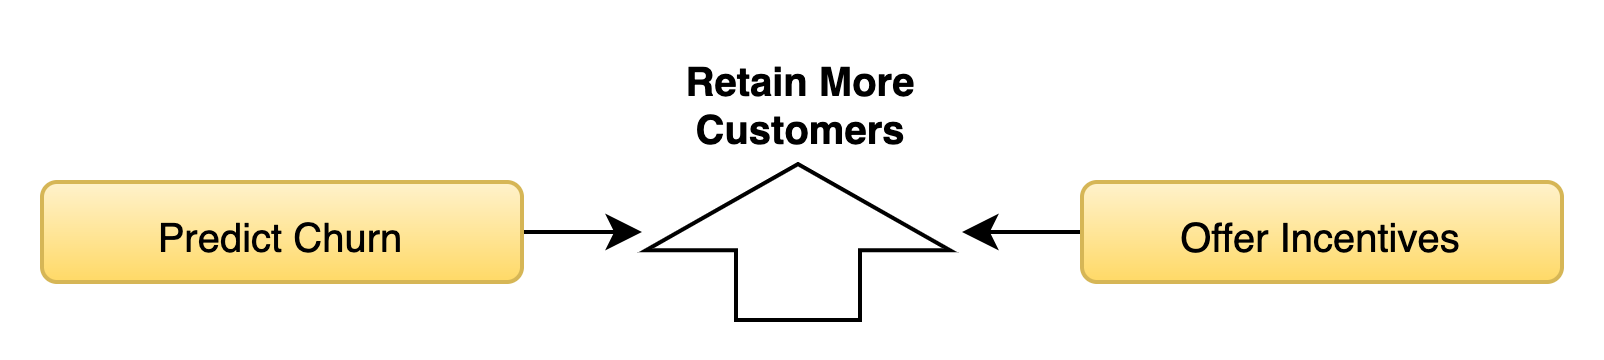

To select a model and then well train a model, we need the following information from the EDA:
1. If the class is balanced or imbalanced
2. Determine if it's a categorical or other problem case
3. Size of the dataset
3. Feature relevance / selection: the features that differentiate, or are most closely correllated with, customers who leave from those who stay
4. Data insights: such as identifying complex, non-linear relationships between features



### Approach to EDA
The approach begins with statistical analyses to understand the target variable's distribution, characteristics, and the most impactful features. Next, conduct.....

Note: The target feature: the 'EndDate' column = 'No.'

#### Step #1: Univariate Analysis (Assessing the Target Variable)
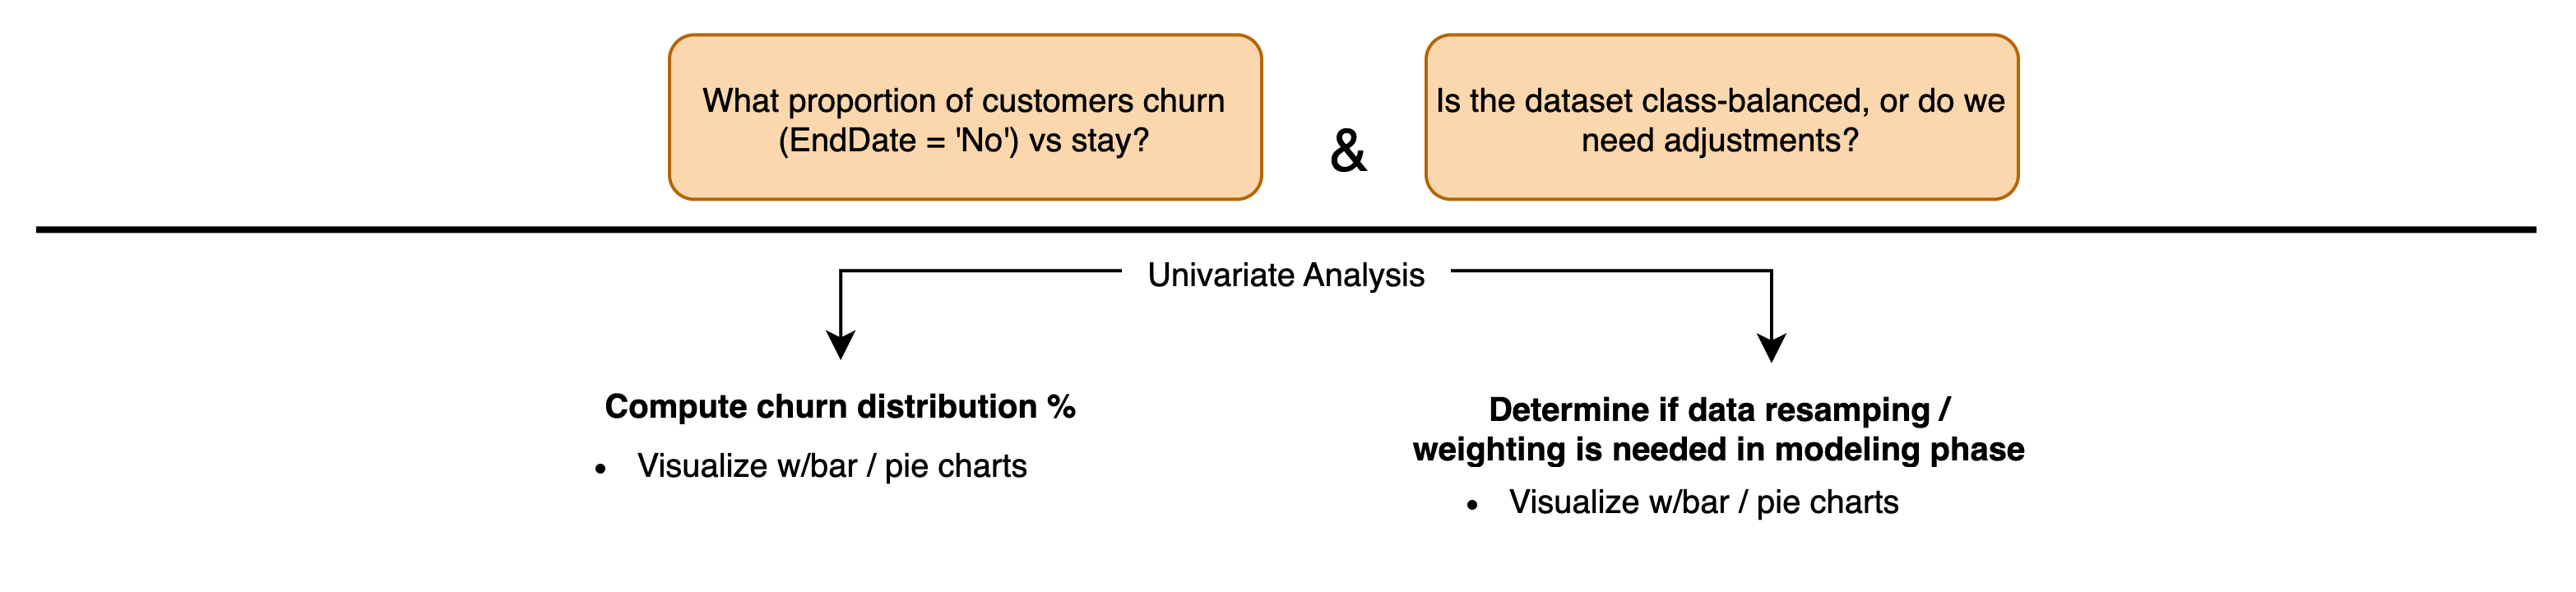

#### Step #2: Time Series Analysis (Churn Trends Over Time)

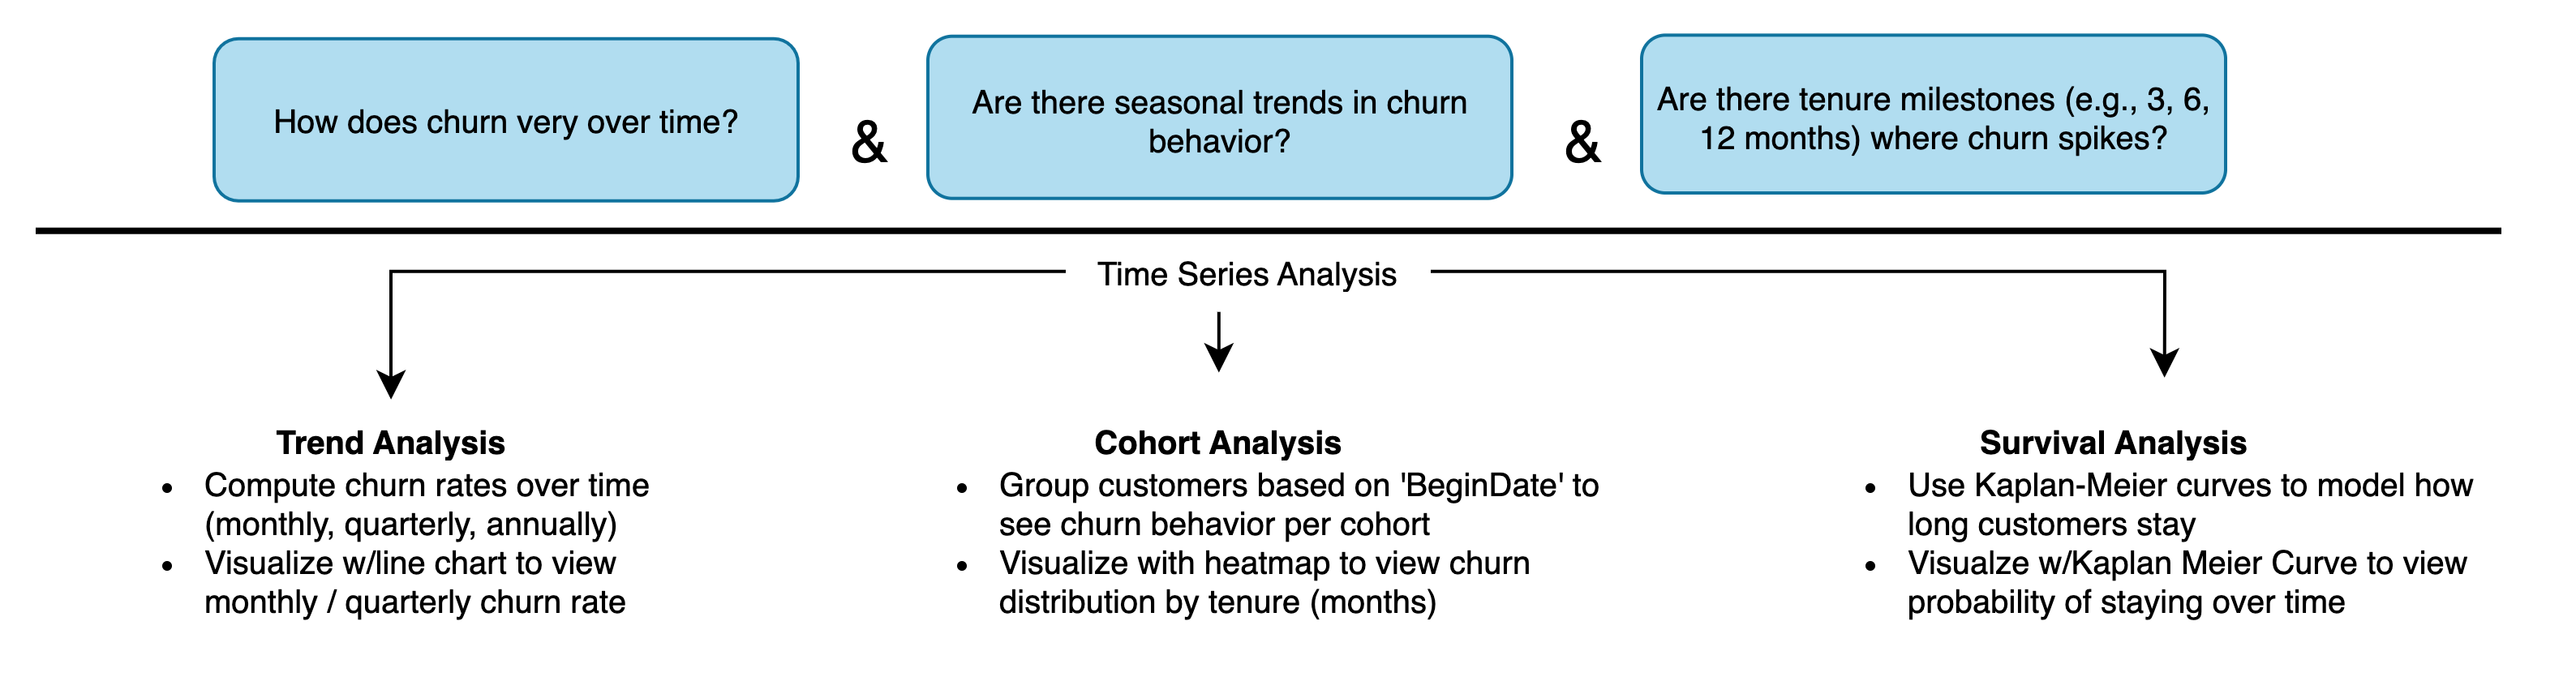

#### Step #3: Bivariate & Multivariate Analysis (Feature-Churn Relationships) 

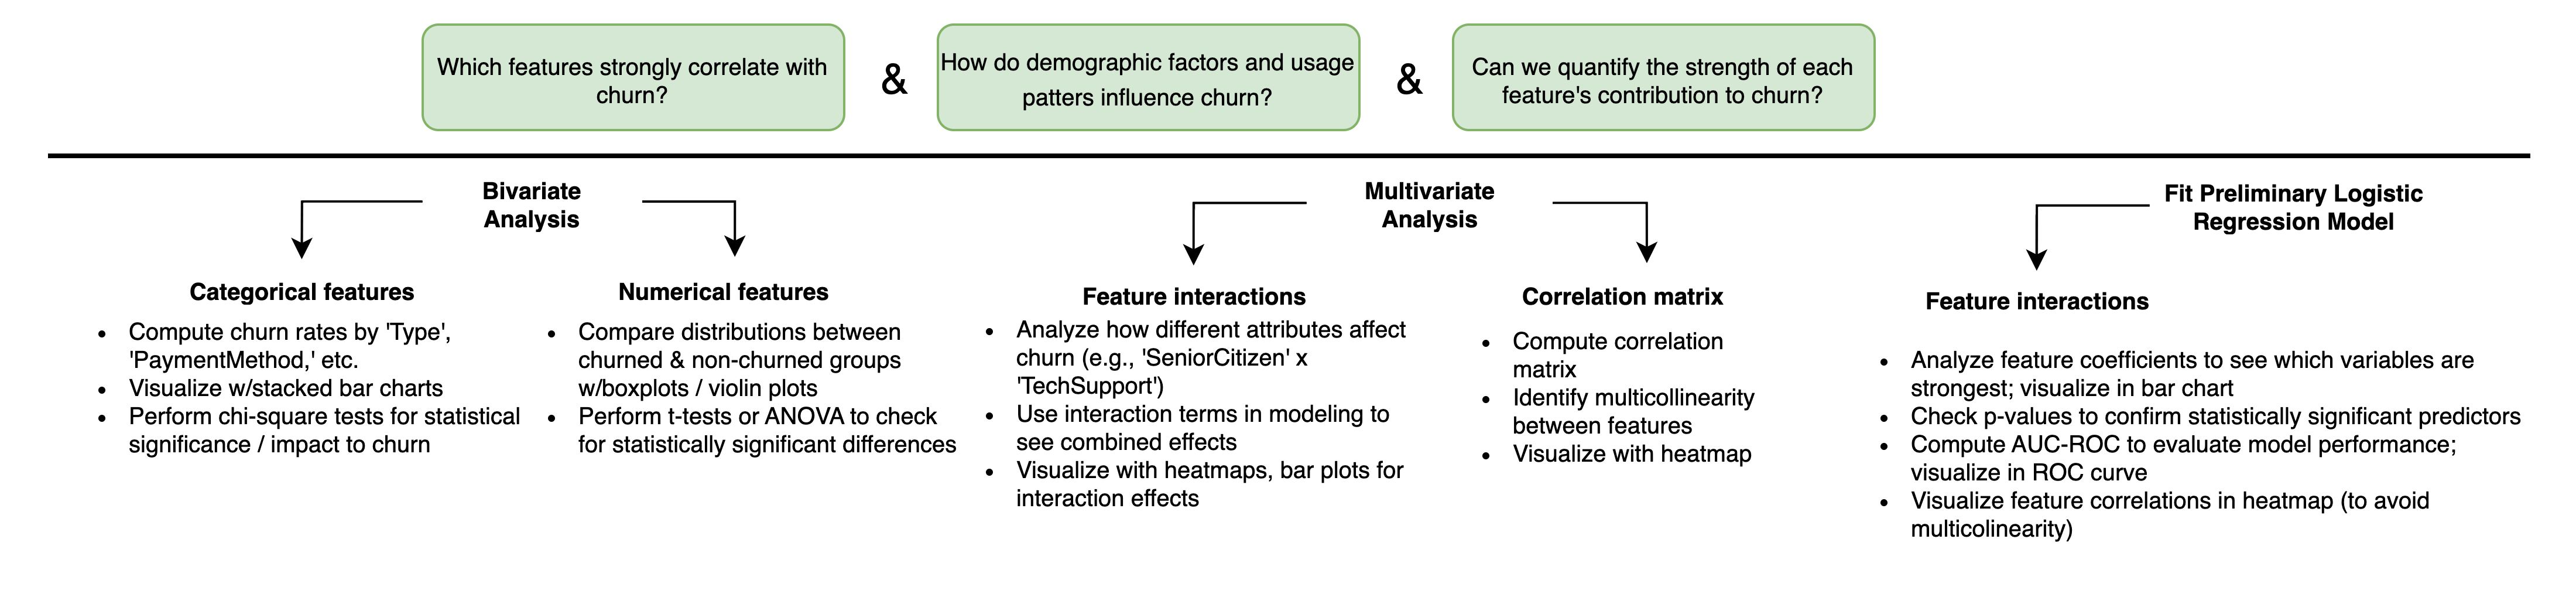

#### Step #4: Custering & Anomaly Detection (Unsupervised Learning for Segmentation & Risk Identification)

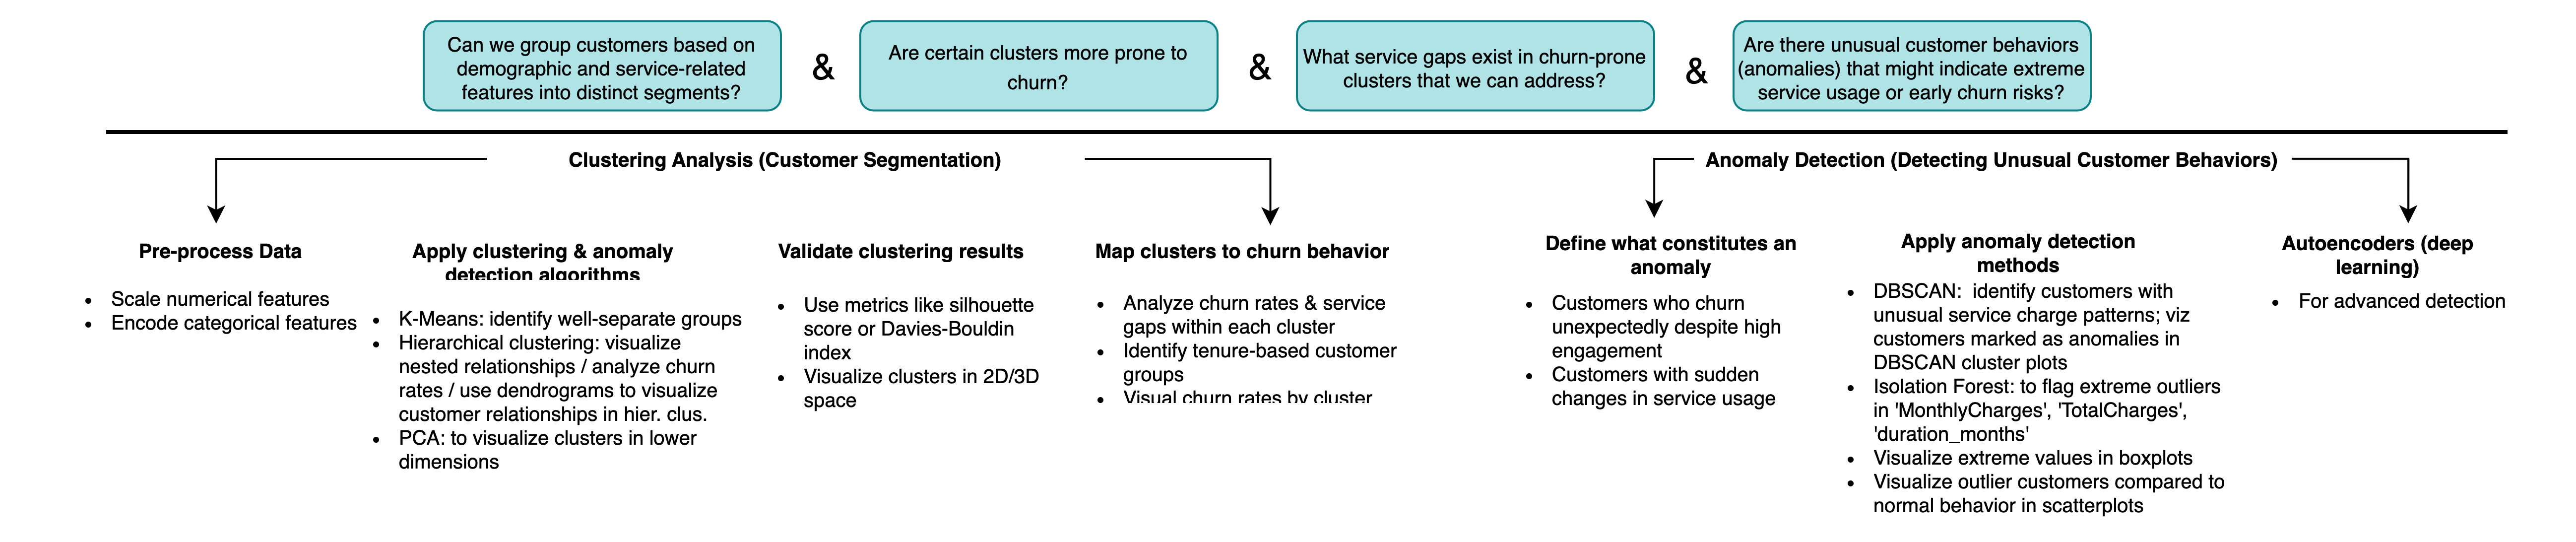


#### Step #4: Segmentation Analysis for Retention Strategies

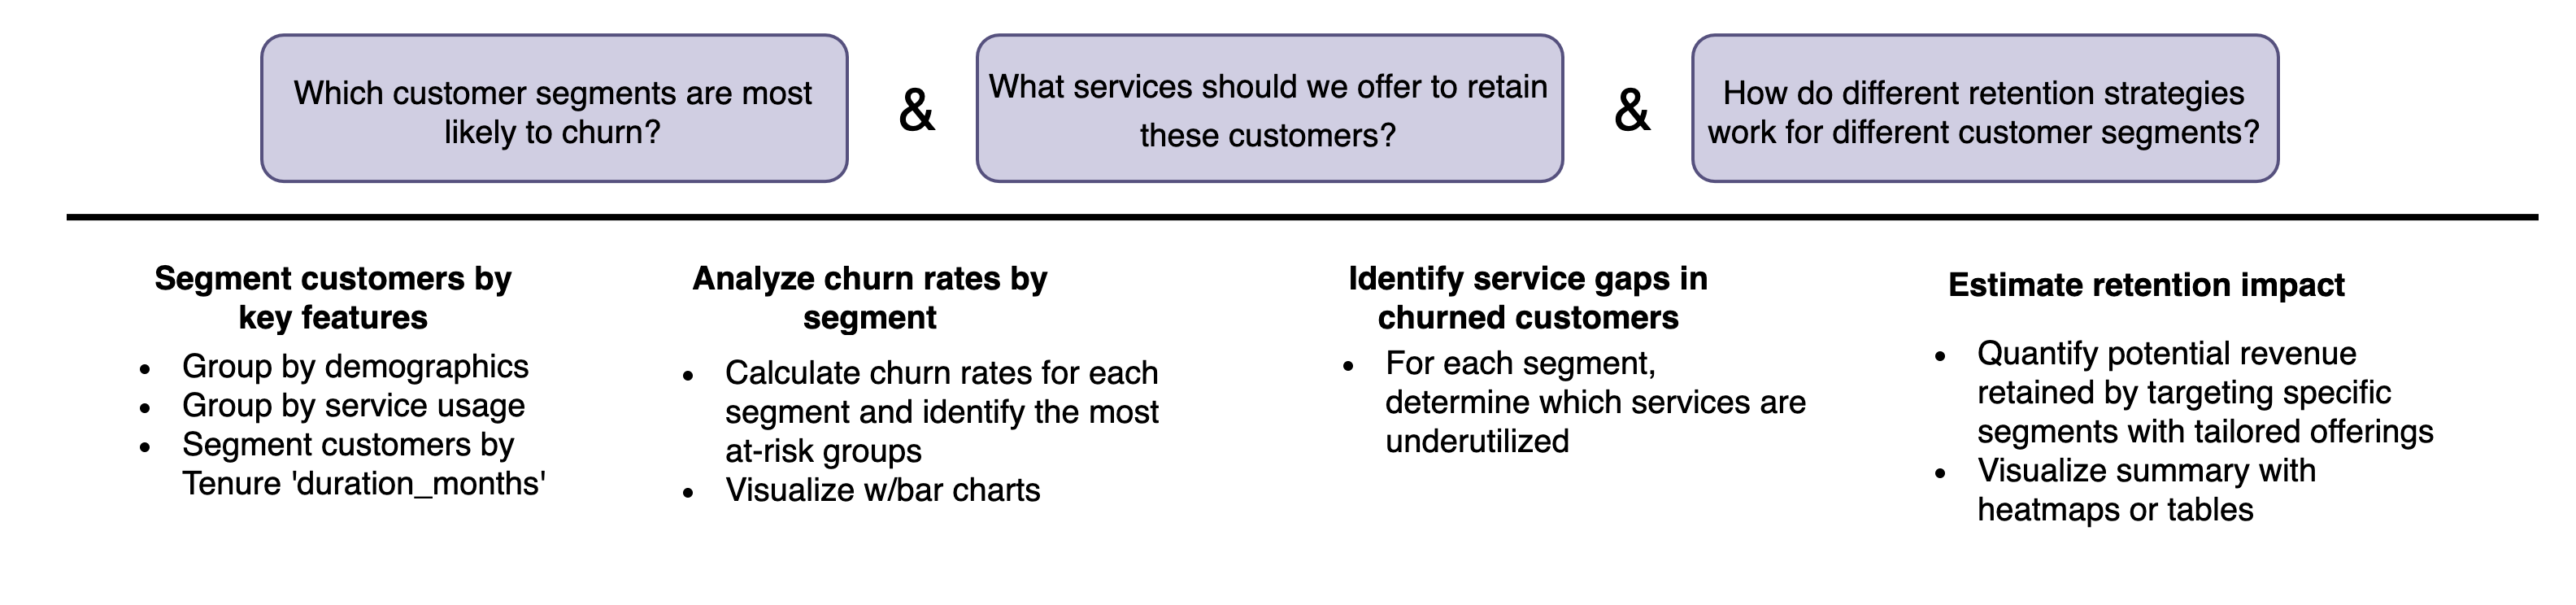


# EXECUTE THE EDA
 For a supervised ML,since the goal is to predict churn ,te best featyres are those that correlate strongly with churn

 Customers with month to month contracts are more likely to churn thsn those with long term contracts,customers using electronic checks,higher charges also indicate a risk of churn,new customers also  are more likell to  churn compared to long term ones. 
 
 Recommended  models are Logistic Regression which works well for linearly separable data and highly interpreteable feautures.

    Decision Tree algorithm can also be used to train the model.
#The most impactful features will likely include:  Contract Type – Customers on month-to-month contracts are more likely to churn.

 #Tenure (duration_months) – Longer tenure indicates a lower chance of churn.

 #TotalCharges – Higher lifetime spending might indicate a loyal customer.

 #Payment Method – Electronic check customers tend to churn more.
 
 Internet Service Type – Fiber optic users might churn more due to competition.


<h2 style="color:blue;">1. Univariate Analysis(Assessing The Target Variable)</h2>


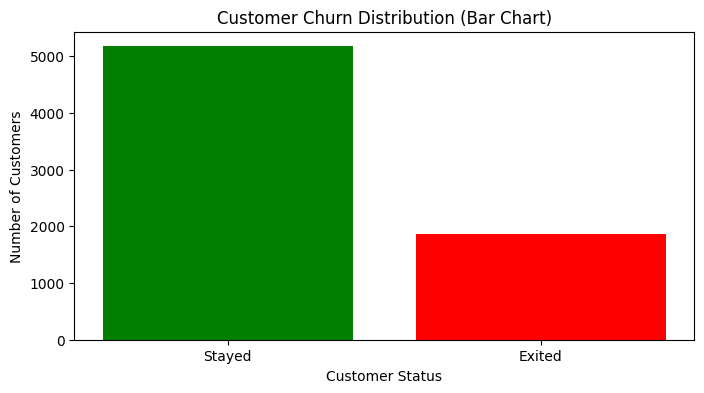

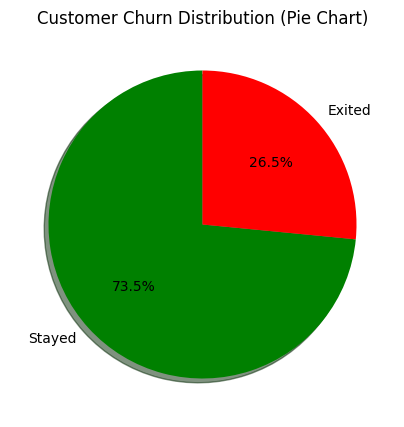

In [30]:

#import pandas as pd
#import matplotlib.pyplot as plt

# Load the dataset (assuming it's a CSV file)
# data = pd.read_csv("your_file.csv")

# Count the number of exited vs non-exited customers
churn_counts = data_merged['exited'].value_counts()

# Define labels
labels = ['Stayed', 'Exited']

# Create a Bar Chart
plt.figure(figsize=(8, 4))
plt.bar(labels, churn_counts, color=['green', 'red'])
plt.xlabel("Customer Status")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Distribution (Bar Chart)")
plt.show()

# Create a Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=['green', 'red'], startangle=90, shadow=True)
plt.title("Customer Churn Distribution (Pie Chart)")
plt.show()


In [31]:
# The dataset class is balanced and no adjustments are needed



# Load the dataset (assuming it's a CSV file)
# data = pd.read_csv("your_file.csv")

# Count the number of exited vs. non-exited customers
churn_counts = data_merged['exited'].value_counts()

# Display the counts
print(churn_counts)

# Check class imbalance
total_customers = len(data_merged)
churn_percentage = (churn_counts / total_customers) * 100
print(f"Churn Percentage:\n{churn_percentage}")


exited
0    5174
1    1869
Name: count, dtype: int64
Churn Percentage:
exited
0    73.463013
1    26.536987
Name: count, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_6344\806975019.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values,legend='False', palette=["green", "red"])


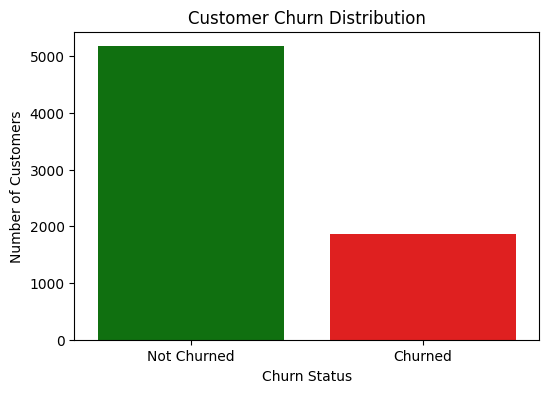

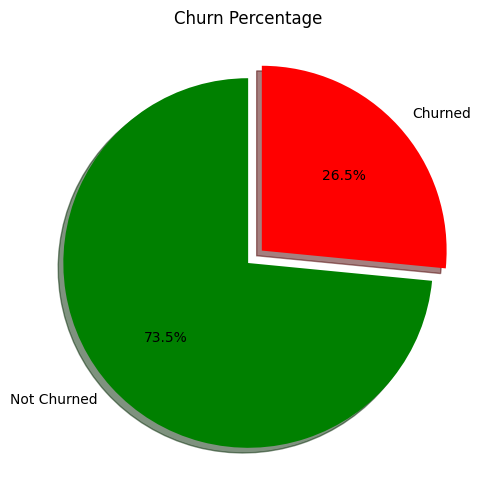

In [32]:


# Load data 
churn_counts = data_merged['exited'].value_counts()
total_customers = len(data_merged)
churn_percentage = (churn_counts / total_customers) * 100

# Bar Chart
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values,legend='False', palette=["green", "red"])
plt.xticks(ticks=[0, 1], labels=["Not Churned", "Churned"])
plt.ylabel("Number of Customers")
plt.xlabel("Churn Status")
plt.title("Customer Churn Distribution")
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=["Not Churned", "Churned"], autopct="%1.1f%%", 
        colors=["green", "red"], startangle=90, explode=[0, 0.1], shadow=True)
plt.title("Churn Percentage")
plt.show()



<h2 style="color:blue;">2.Time Series Analysis (Churn Trends  Time)</h2>

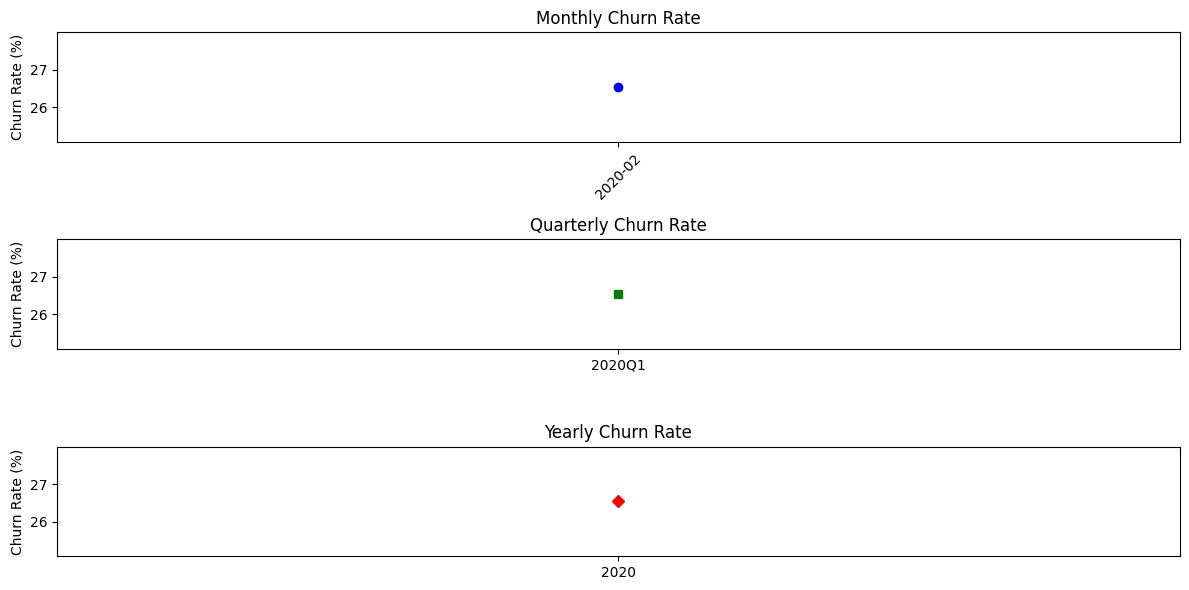

In [33]:
# How does churn vary overtime?



# Convert date columns to datetime format
data_merged['begindate'] = pd.to_datetime(data_merged['begindate'])
data_merged['enddate'] = pd.to_datetime(data_merged['enddate'])

# Extract month, quarter, and year
data_merged['churn_month'] = data_merged['enddate'].dt.to_period('M')
data_merged['churn_quarter'] = data_merged['enddate'].dt.to_period('Q')
data_merged['churn_year'] = data_merged['enddate'].dt.to_period('Y')

# Compute churn rates for monthly, quarterly, and yearly periods
monthly_churn = data_merged.groupby('churn_month')['exited'].mean() * 100
quarterly_churn = data_merged.groupby('churn_quarter')['exited'].mean() * 100
yearly_churn = data_merged.groupby('churn_year')['exited'].mean() * 100

# Plot churn rates over time
plt.figure(figsize=(12, 6))

# Monthly Churn
plt.subplot(3, 1, 1)
plt.plot(monthly_churn.index.astype(str), monthly_churn, marker='o', linestyle='-', color='b')
plt.title('Monthly Churn Rate')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

# Quarterly Churn
plt.subplot(3, 1, 2)
plt.plot(quarterly_churn.index.astype(str), quarterly_churn, marker='s', linestyle='-', color='g')
plt.title('Quarterly Churn Rate')
plt.ylabel('Churn Rate (%)')

# Yearly Churn
plt.subplot(3, 1, 3)
plt.plot(yearly_churn.index.astype(str), yearly_churn, marker='D', linestyle='-', color='r')
plt.title('Yearly Churn Rate')
plt.ylabel('Churn Rate (%)')

plt.tight_layout()
plt.show()


In [34]:
# Are there seasonal trends in churn behaviour


# Convert begindate and enddate to datetime
#data_merged["begindate"] = pd.to_datetime(data_merged["begindate"])
#data_merged["enddate"] = pd.to_datetime(data_merged["enddate"])
# Extract year-month for cohort grouping
data_merged["exited"] = data_merged["exited"].dt.to_period("M")
data_merged["duration_months"] = data_merged["duration_months"].dt.to_period("M")

# Create cohort churn matrix (rows: cohorts, cols: churn month)
cohort_churn = data_merged.pivot_table(index="exited", columns="duration_months", values="exited", aggfunc="mean")

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_churn, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Churn Rate by Customer Cohort Over Time")
plt.xlabel("Churn Month")
plt.ylabel("Customer Cohort (Join Month)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()





    

AttributeError: Can only use .dt accessor with datetimelike values

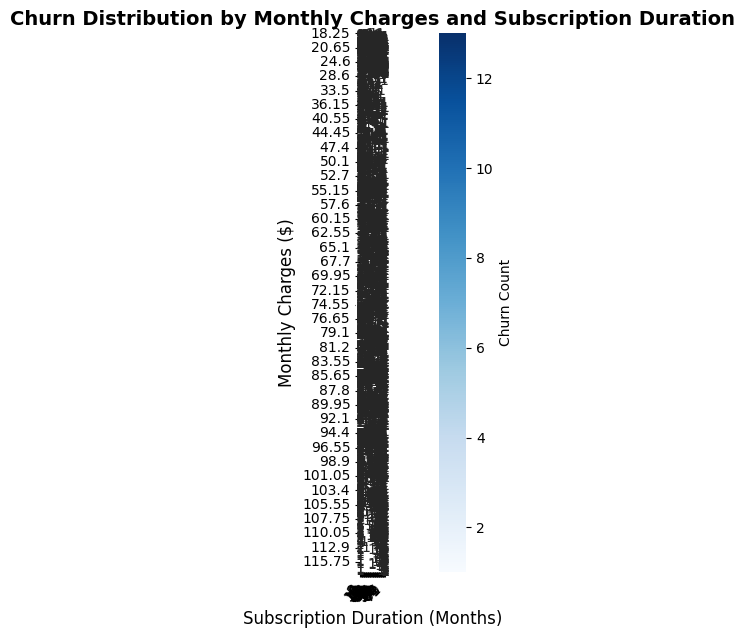

In [35]:


# Load dataset
data = data_merged.copy()

# Count churn occurrences per cohort and churn month
churn_trends = data.groupby(['monthlycharges', 'duration_months']).size().unstack()

# Plot the heatmap
plt.figure(figsize=(14, 7))  # Increase figure size for clarity
sns.heatmap(churn_trends, cmap='Blues', annot=True, fmt='.0f', linewidths=0.7, 
            cbar_kws={'label': 'Churn Count'}, square=True)

# Improve title and labels
plt.title("Churn Distribution by Monthly Charges and Subscription Duration", fontsize=14, fontweight='bold')
plt.xlabel("Subscription Duration (Months)", fontsize=12)
plt.ylabel("Monthly Charges ($)", fontsize=12)

# Rotate tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Display the heatmap
plt.show()


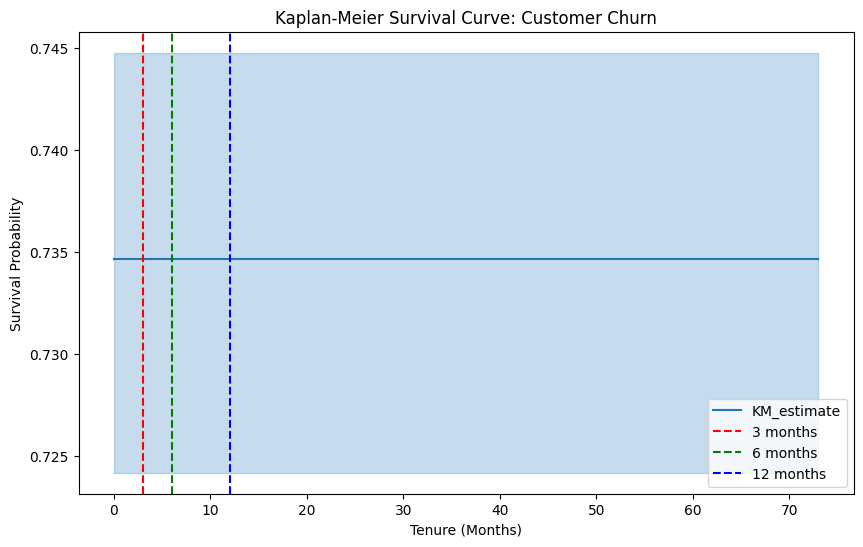

In [36]:
# Are there Tenure milestones eg 3,6 and 12 months where churn spikes?

from lifelines import KaplanMeierFitter

# Load dataset (assuming it's already loaded as df)
df = data_merged.copy()

# Select required columns
time = df["duration_months"]  # Duration in months
event = df["exited"]          # Churn indicator (1 = churned, 0 = active)

# Initialize Kaplan-Meier Fitter
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(time, event_observed=event)

# Plot the survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.axvline(x=3, color='r', linestyle='--', label="3 months")
plt.axvline(x=6, color='g', linestyle='--', label="6 months")
plt.axvline(x=12, color='b', linestyle='--', label="12 months")
plt.title("Kaplan-Meier Survival Curve: Customer Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()



<h2 style="color:blue;">3.Bivariate & Multivariate Analysis(Feature-Churn Relationships)</h2>

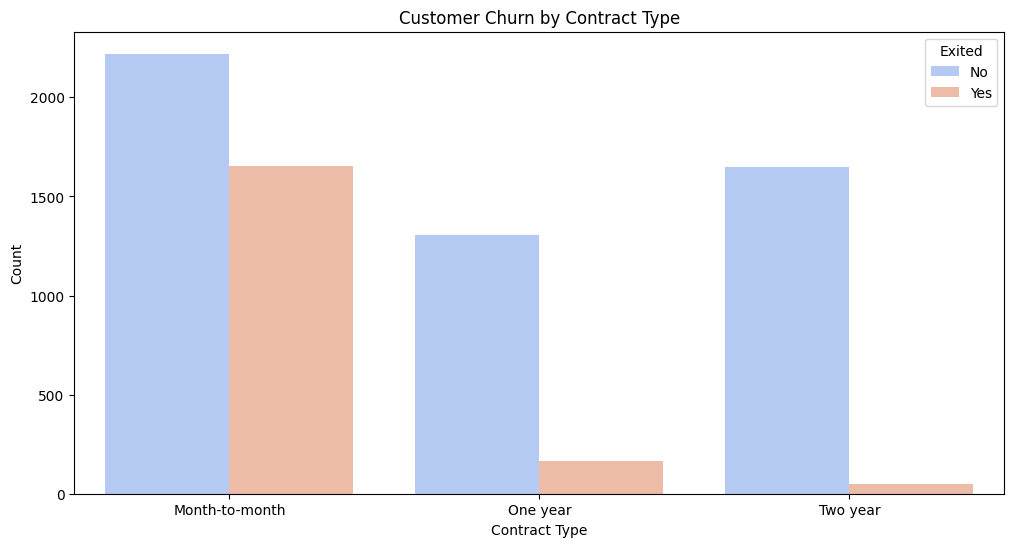

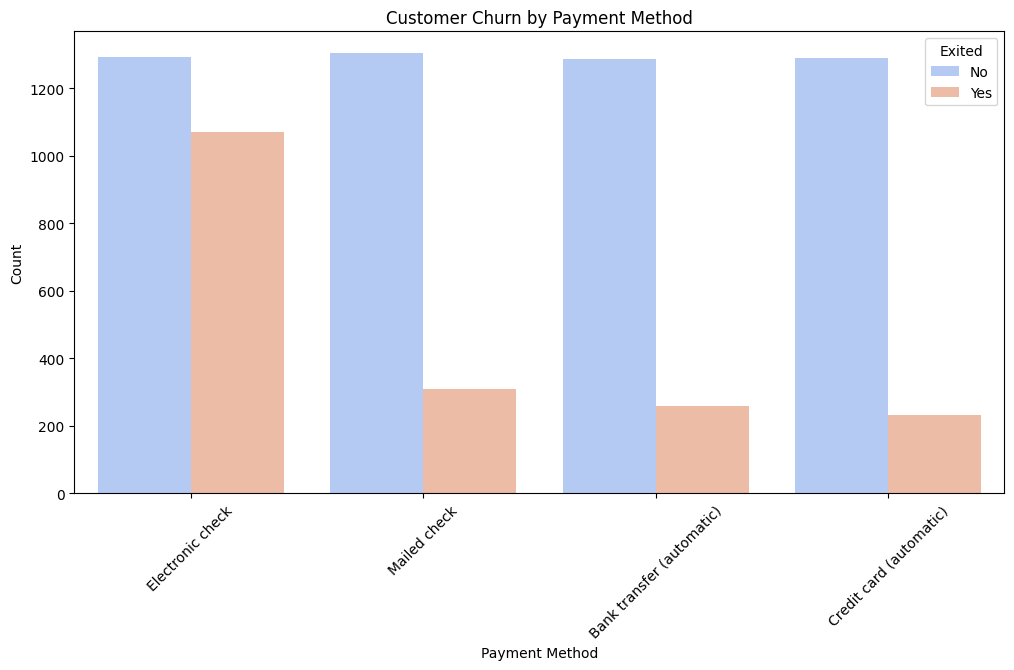

Chi-Square Test for Contract Type: Chi2 = 1184.60, p-value = 0.0000
Chi-Square Test for Payment Method: Chi2 = 648.14, p-value = 0.0000


In [37]:


from scipy.stats import chi2_contingency


# Convert categorical columns to appropriate types
data_merged['type'] = data_merged['type'].astype(str)
data_merged['paymentmethod'] = data_merged['paymentmethod'].astype(str)
data_merged['exited'] = data_merged['exited'].astype(int)

# Compute churn rates by 'Type' and 'PaymentMethod'
churn_by_type = data_merged.groupby('type')['exited'].mean().reset_index()
churn_by_payment = data_merged.groupby('paymentmethod')['exited'].mean().reset_index()

# Visualizing with stacked bar charts
plt.figure(figsize=(12, 6))
sns.countplot(data=data_merged, x='type', hue='exited', palette='coolwarm')
plt.title('Customer Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=data_merged, x='paymentmethod', hue='exited', palette='coolwarm')
plt.title('Customer Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

# Chi-square test for Contract Type
contingency_type = pd.crosstab(data_merged['type'], data_merged['exited'])
chi2_type, p_type, _, _ = chi2_contingency(contingency_type)
print(f"Chi-Square Test for Contract Type: Chi2 = {chi2_type:.2f}, p-value = {p_type:.4f}")

# Chi-square test for Payment Method
contingency_payment = pd.crosstab(data_merged['paymentmethod'], data_merged['exited'])
chi2_payment, p_payment, _, _ = chi2_contingency(contingency_payment)
print(f"Chi-Square Test for Payment Method: Chi2 = {chi2_payment:.2f}, p-value = {p_payment:.4f}")


C:\Users\user\AppData\Local\Temp\ipykernel_6344\1844570423.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_merged['exited'], y=data_merged[feature], palette="coolwarm")
C:\Users\user\AppData\Local\Temp\ipykernel_6344\1844570423.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_merged['exited'], y=data_merged[feature], palette="coolwarm")
C:\Users\user\AppData\Local\Temp\ipykernel_6344\1844570423.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_merged['exited'], y=data_merged[feature], palette="coolwarm")


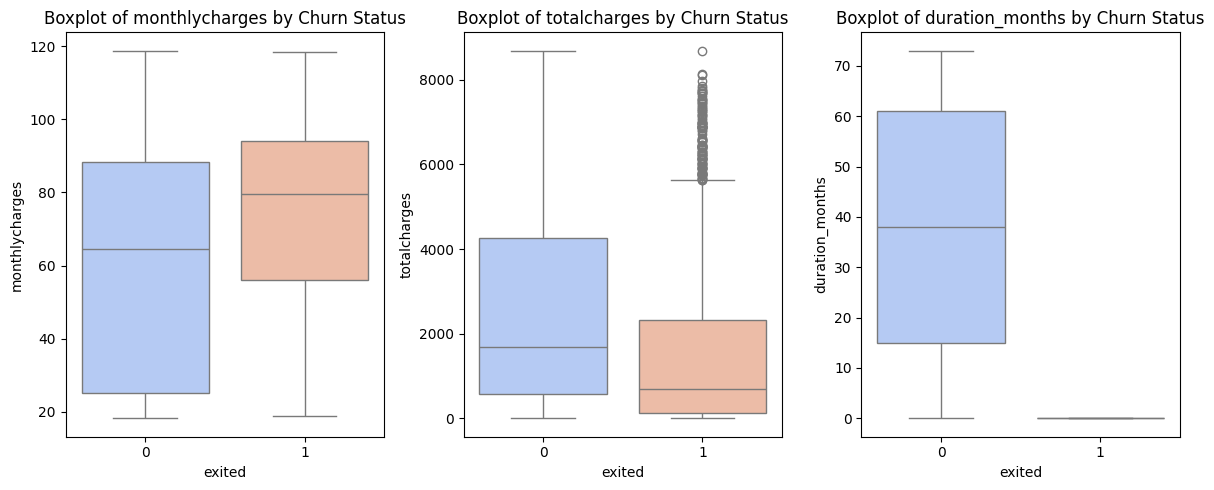

T-test for monthlycharges: t-statistic = 16.54, p-value = 0.0000
T-test for totalcharges: t-statistic = -16.98, p-value = 0.0000
T-test for duration_months: t-statistic = -66.98, p-value = 0.0000


In [38]:

from scipy.stats import ttest_ind
import warnings


# Convert dates to datetime
data_merged['begindate'] = pd.to_datetime(data_merged['begindate'])
data_merged['enddate'] = pd.to_datetime(data_merged['enddate'])

# Define churned and non-churned groups
churned = data_merged[data_merged['exited'] == 1]
non_churned = data_merged[data_merged['exited'] == 0]

# Select numeric features for comparison
numeric_features = ['monthlycharges', 'totalcharges', 'duration_months']

# Boxplots for numeric features
plt.figure(figsize=(12, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data_merged['exited'], y=data_merged[feature], palette="coolwarm")
    plt.title(f"Boxplot of {feature} by Churn Status")
plt.tight_layout()
plt.show()

# Perform T-tests
for feature in numeric_features:
    t_stat, p_value = ttest_ind(churned[feature], non_churned[feature], nan_policy='omit')
    print(f"T-test for {feature}: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")


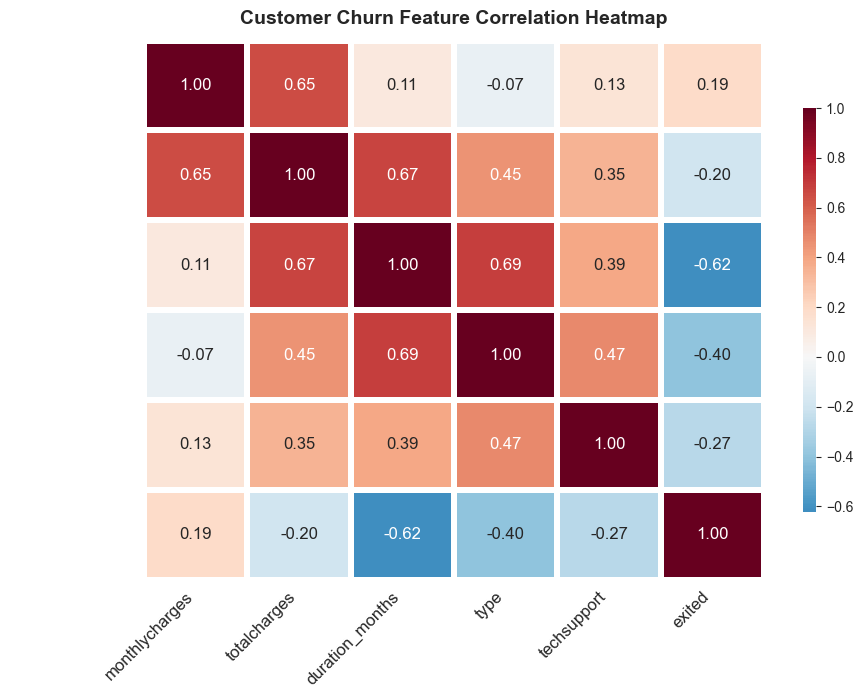

In [39]:


# Load dataset (assuming it's already in a DataFrame named df)
columns_to_use = ['monthlycharges', 'totalcharges', 'duration_months', 'type', 'techsupport', 'exited']
df_selected = data_merged[columns_to_use].copy()

# Encode categorical columns ('type' and 'techsupport') into numerical values
df_selected['type'] = df_selected['type'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df_selected['techsupport'] = df_selected['techsupport'].map({'Yes': 1, 'No': 0})
df_selected['exited'] = df_selected['exited'].astype(int)  # Ensure 'exited' is numeric

# Compute the correlation matrix
corr_matrix = df_selected.corr()

# Set up the figure
plt.figure(figsize=(10, 7))
sns.set_style("darkgrid")


# Custom heatmap
sns.heatmap(
    corr_matrix, annot=True, cmap="RdBu_r", linewidths=3, fmt=".2f",
    annot_kws={"size": 12}, center=0, cbar_kws={'shrink': 0.75, 'aspect': 30}
)

# Title & Labels
plt.title("Customer Churn Feature Correlation Heatmap", fontsize=14, fontweight="bold", pad=12)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12, rotation=0,color='white')

# Show plot
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6344\4139991578.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['totalcharges'] = pd.to_numeric(df_selected['totalcharges'], errors='coerce')


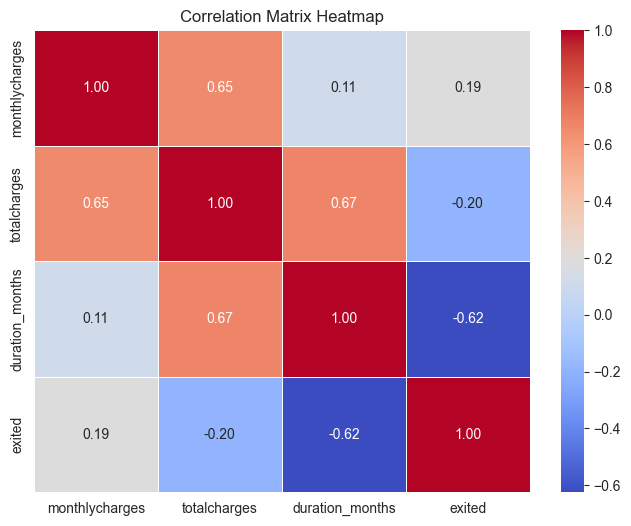

In [40]:

#IMPORTANCE AND THEIR INFLUENCE TO CHURN
#correlation matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression




# Load the dataset
df = data_merged  # Ensure the correct file name

# Select relevant numerical columns
selected_columns = ['monthlycharges', 'totalcharges', 'duration_months', 'exited']
df_selected = df[selected_columns]

# Convert 'totalcharges' to numeric (if not already)
df_selected['totalcharges'] = pd.to_numeric(df_selected['totalcharges'], errors='coerce')

# Compute correlation matrix
correlation_matrix = df_selected.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix Heatmap")

# Show plot
plt.show()




C:\Users\user\AppData\Local\Temp\ipykernel_6344\2994026143.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["totalcharges"] = pd.to_numeric(X["totalcharges"], errors="coerce")
C:\Users\user\AppData\Local\Temp\ipykernel_6344\2994026143.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index,palette="viridis")


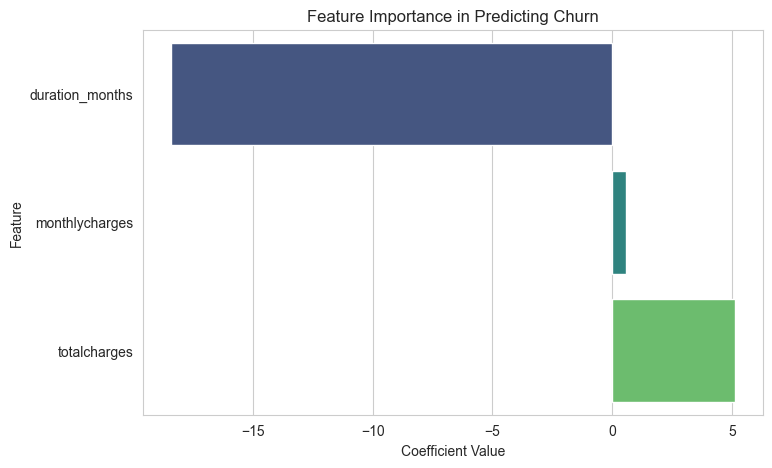

In [41]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load data
data = data_merged


# Select relevant columns
features = ["monthlycharges", "totalcharges", "duration_months"]
X = data[features]
y = data["exited"]

# Convert 'totalcharges' to numeric (handle errors)
X["totalcharges"] = pd.to_numeric(X["totalcharges"], errors="coerce")

# Handle missing values
X = X.fillna(X.median())

# Ensure dataset is not empty
if X.shape[0] == 0:
    raise ValueError("No valid data samples found after preprocessing!")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y)

# Extract coefficients
coefficients = model.coef_[0]
feature_importance = pd.Series(coefficients, index=features).sort_values()

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index,palette="viridis")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Churn")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6344\1524045384.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["totalcharges"] = pd.to_numeric(X["totalcharges"], errors="coerce")


AUC-ROC Score: 0.8181


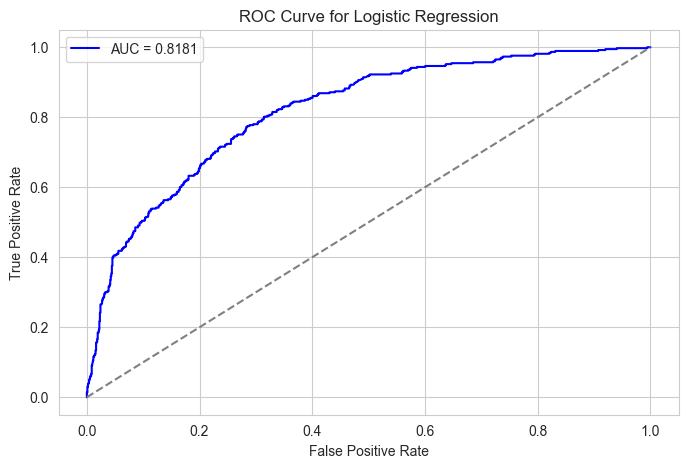

In [42]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

# Load data
data = data_merged

# Drop non-informative columns
#data.drop(["customerID", "begindate", "enddate"], axis=1, errors="ignore", inplace=True)

# Select relevant columns
features = ["monthlycharges", "totalcharges"]
X = data[features]
y = data["exited"]

# Convert 'totalcharges' to numeric (handle errors)
X["totalcharges"] = pd.to_numeric(X["totalcharges"], errors="coerce")

# Handle missing values
X = X.fillna(X.median())

# Ensure dataset is not empty
if X.shape[0] == 0:
    raise ValueError("No valid data samples found after preprocessing!")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Compute AUC-ROC
auc = roc_auc_score(y_test, y_probs)
print(f"AUC-ROC Score: {auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6344\2644486351.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["totalcharges"] = pd.to_numeric(X["totalcharges"], errors="coerce")


AUC-ROC Score: 0.8181


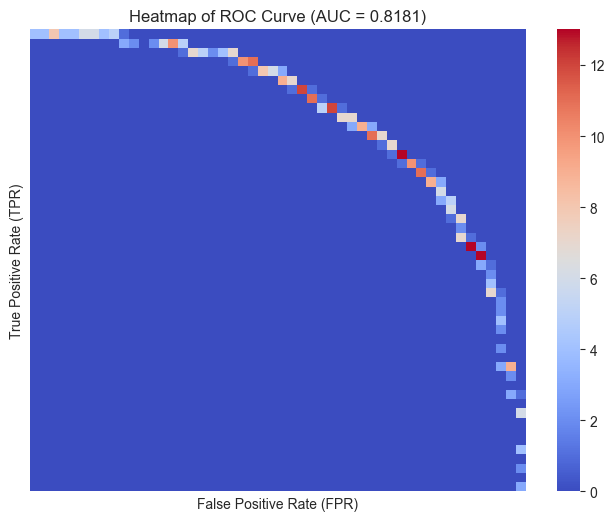

In [45]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
# Load data
data = data_merged  # Make sure 'data_merged' exists in your environment

# Select relevant columns
features = ["monthlycharges", "totalcharges"]
X = data[features]
y = data["exited"]

# Convert 'totalcharges' to numeric
X["totalcharges"] = pd.to_numeric(X["totalcharges"], errors="coerce")

# Handle missing values
X = X.fillna(X.median())

# Ensure dataset is not empty
if X.shape[0] == 0:
    raise ValueError("No valid data samples found after preprocessing!")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Compute AUC-ROC
auc = roc_auc_score(y_test, y_probs)
print(f"AUC-ROC Score: {auc:.4f}")

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Convert FPR and TPR into a heatmap format
heatmap_data = np.histogram2d(fpr, tpr, bins=(50, 50))[0]  # 2D histogram

# Plot Heatmap of ROC curve
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title(f"Heatmap of ROC Curve (AUC = {auc:.4f})")
plt.show()



<h2 style="color:blue;">STEP 4 CUSTERING & Anomaly Detection(Unsupervised Learning for Segmentation & Risk Identification)</h2>

In [46]:
#4 CASTORING ANOMALY 4


from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Load Data (Replace this with actual file loading if needed)
data = data_merged.copy()

# Drop non-informative columns
data.drop(["customerid", "begindate", "enddate"], axis=1, inplace=True, errors="ignore")

# Identify column types
numeric_cols = ["monthlycharges", "totalcharges", "duration_months"]
categorical_cols = data.select_dtypes(include=["object", "bool"]).columns.tolist()

# Remove target variable 'exited' from categorical columns if present
#categorical_cols.remove("exited")

# Convert 'totalcharges' to numeric (handle errors)
data["totalcharges"] = pd.to_numeric(data["totalcharges"], errors="coerce")

# Handle missing values: Fill numeric columns with median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Encode binary categorical columns (Yes/No, True/False)
binary_cols = [col for col in categorical_cols if data[col].nunique() == 2]
for col in binary_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# One-Hot Encode remaining categorical columns
one_hot_cols = [col for col in categorical_cols if col not in binary_cols]
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Final Processed Data
print("Processed Dataset Preview:")
print(data.head())

# Save to CSV (Optional)
# data.to_csv("processed_data.csv", index=False)



Processed Dataset Preview:
   paperlessbilling  monthlycharges  totalcharges  duration_months  exited  \
0                 1       -1.160323     -0.992611        -1.000589       0   
1                 0       -0.259629     -0.172165         0.234348       0   
2                 1       -0.362660     -0.958066        -1.038012       1   
3                 0       -0.746535     -0.193672         0.645994       0   
4                 1        0.197365     -0.938874        -1.038012       1   

   automatic_pay  gender  seniorcitizen  partner  dependents  ...  \
0              0       0              0        1           0  ...   
1              0       1              0        0           0  ...   
2              0       1              0        0           0  ...   
3              1       1              0        0           0  ...   
4              0       0              0        0           0  ...   

   deviceprotection_Yes  deviceprotection_no  techsupport_Yes techsupport_no  \
0        

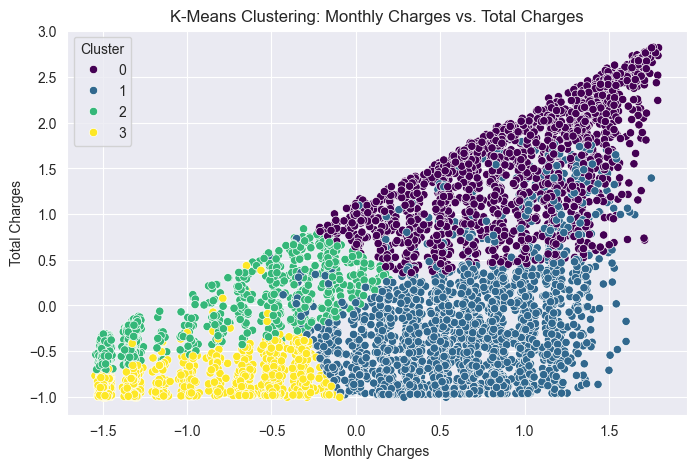

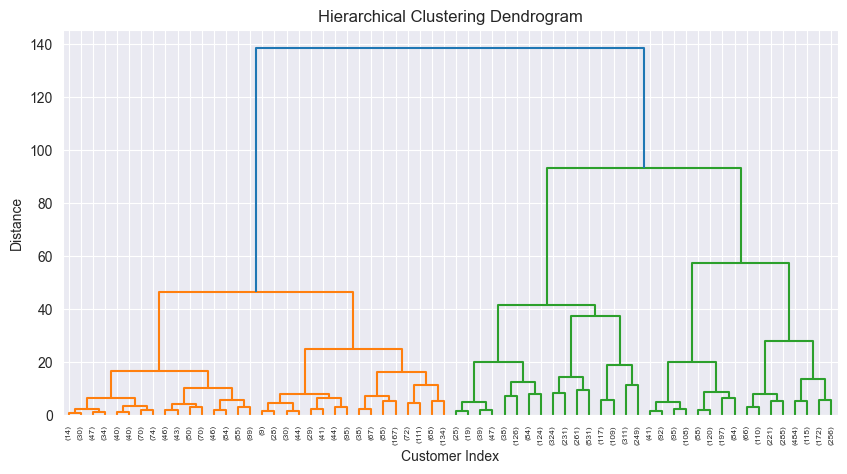

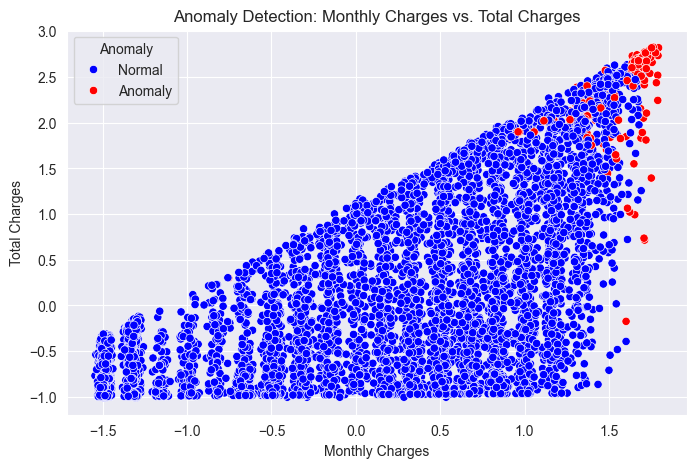

kmeans_cluster  hierarchical_cluster  anomaly
1               2                     Normal     2283
3               1                     Normal     1629
0               0                     Normal     1538
2               3                     Normal      709
                0                     Normal      289
                2                     Normal      141
3               2                     Normal       90
                3                     Normal       86
1               1                     Normal       80
0               0                     Anomaly      66
                2                     Anomaly      61
                                      Normal       47
1               2                     Anomaly      13
                0                     Normal       10
2               0                     Anomaly       1
Name: count, dtype: int64


In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from scipy.cluster.hierarchy import dendrogram, linkage

# Ensure data_merged is defined
try:
    data = data_merged.copy()  # Create a copy to avoid modifying the original dataset
except NameError:
    raise ValueError("Dataset 'data_merged' is not defined. Please load your dataset.")

# Drop non-informative columns
data.drop(columns=["customerid", "begindate", "enddate"], errors="ignore", inplace=True)

# Identify column types
numeric_cols = ["monthlycharges", "totalcharges", "duration_months"]
categorical_cols = data.select_dtypes(include=["object", "bool"]).columns.tolist()

# Remove target variable 'exited' if present
if "exited" in categorical_cols:
    categorical_cols.remove("exited")

# Convert 'totalcharges' to numeric (handle errors)
data["totalcharges"] = pd.to_numeric(data["totalcharges"], errors="coerce")

# Handle missing values: Fill numeric columns with median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Convert boolean columns to integers
for col in data.select_dtypes(include=["bool"]).columns:
    data[col] = data[col].astype(int)

# Encode binary categorical columns (Yes/No, True/False)
binary_cols = [col for col in categorical_cols if data[col].nunique() == 2]
for col in binary_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# One-Hot Encode remaining categorical columns
one_hot_cols = [col for col in categorical_cols if col not in binary_cols]
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# ======= K-Means Clustering =======
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Explicitly set n_init
data["kmeans_cluster"] = kmeans.fit_predict(data[numeric_cols])  # Fit only on numeric columns

# Visualizing K-Means Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["monthlycharges"], y=data["totalcharges"], hue=data["kmeans_cluster"], palette="viridis")
plt.title("K-Means Clustering: Monthly Charges vs. Total Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.legend(title="Cluster")
plt.show()

# ======= Hierarchical Clustering =======
# Generate linkage matrix
linked = linkage(data[numeric_cols], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
data["hierarchical_cluster"] = hierarchical.fit_predict(data[numeric_cols])

# ======= Anomaly Detection using Isolation Forest =======
iso_forest = IsolationForest(contamination=0.02, random_state=42)
data["anomaly"] = iso_forest.fit_predict(data[numeric_cols])
data["anomaly"] = data["anomaly"].map({1: "Normal", -1: "Anomaly"})

# Visualizing Anomalies
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["monthlycharges"], y=data["totalcharges"], hue=data["anomaly"], palette={"Normal": "blue", "Anomaly": "red"})
plt.title("Anomaly Detection: Monthly Charges vs. Total Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.legend(title="Anomaly")
plt.show()

# Save processed data (Optional)
# data.to_csv("clustered_data.csv", index=False)

# Print Summary
print(data[["kmeans_cluster", "hierarchical_cluster", "anomaly"]].value_counts())


Silhouette Score for K-Means: 0.4469


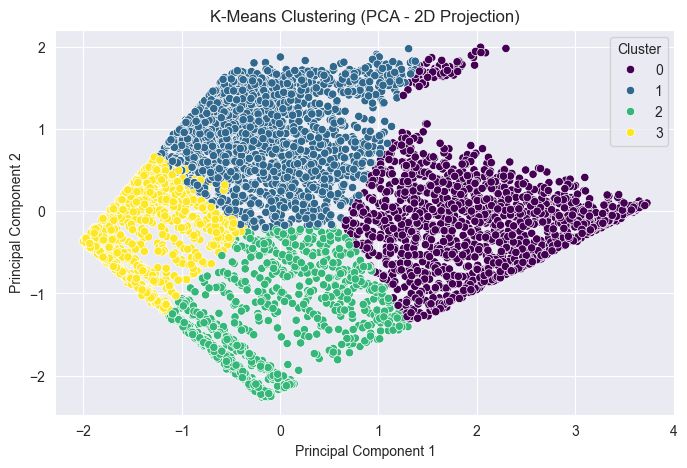

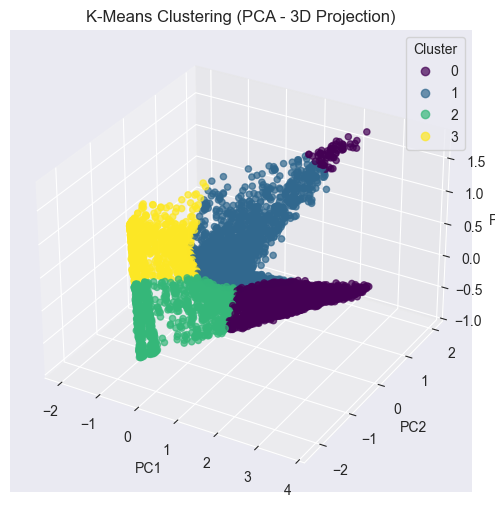

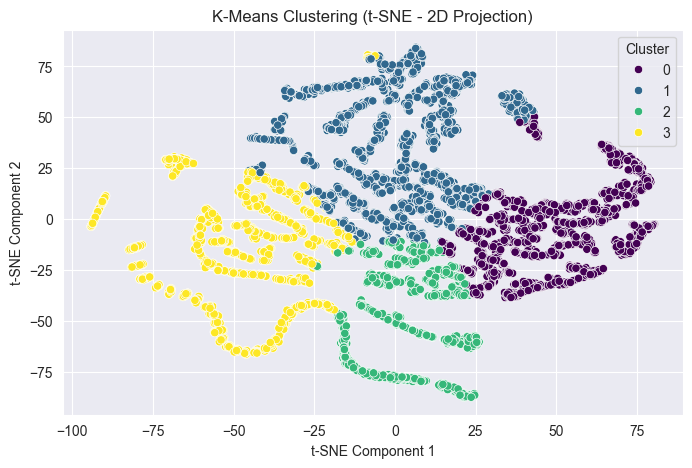

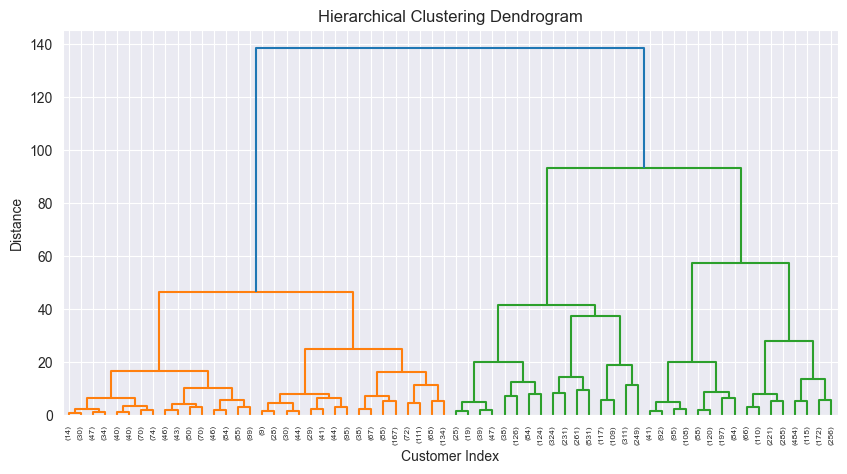

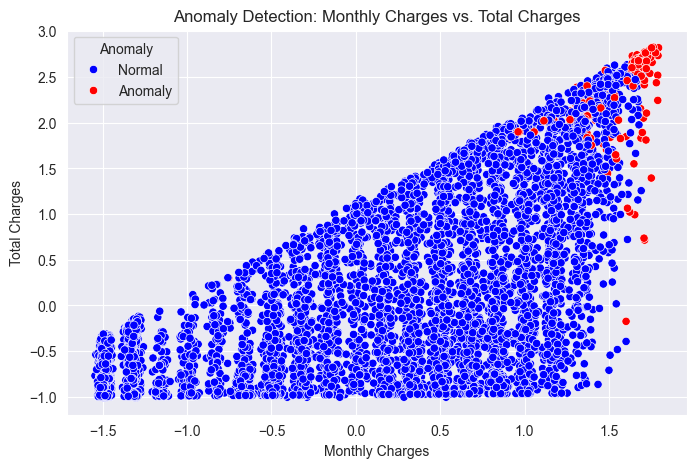

kmeans_cluster  hierarchical_cluster  anomaly
1               2                     Normal     2283
3               1                     Normal     1629
0               0                     Normal     1538
2               3                     Normal      709
                0                     Normal      289
                2                     Normal      141
3               2                     Normal       90
                3                     Normal       86
1               1                     Normal       80
0               0                     Anomaly      66
                2                     Anomaly      61
                                      Normal       47
1               2                     Anomaly      13
                0                     Normal       10
2               0                     Anomaly       1
Name: count, dtype: int64


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Ensure data_merged is defined
try:
    data = data_merged.copy()  # Create a copy to avoid modifying the original dataset
except NameError:
    raise ValueError("Dataset 'data_merged' is not defined. Please load your dataset.")

# Drop non-informative columns
data.drop(columns=["customerid", "begindate", "enddate"], errors="ignore", inplace=True)

# Identify column types
numeric_cols = ["monthlycharges", "totalcharges", "duration_months"]
categorical_cols = data.select_dtypes(include=["object", "bool"]).columns.tolist()

# Remove target variable 'exited' if present
if "exited" in categorical_cols:
    categorical_cols.remove("exited")

# Convert 'totalcharges' to numeric (handle errors)
data["totalcharges"] = pd.to_numeric(data["totalcharges"], errors="coerce")

# Handle missing values: Fill numeric columns with median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Convert boolean columns to integers
for col in data.select_dtypes(include=["bool"]).columns:
    data[col] = data[col].astype(int)

# Encode binary categorical columns (Yes/No, True/False)
binary_cols = [col for col in categorical_cols if data[col].nunique() == 2]
for col in binary_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# One-Hot Encode remaining categorical columns
one_hot_cols = [col for col in categorical_cols if col not in binary_cols]
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# ======= K-Means Clustering =======
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Explicitly set n_init
data["kmeans_cluster"] = kmeans.fit_predict(data[numeric_cols])  # Fit only on numeric columns

# Compute Silhouette Score
silhouette_avg = silhouette_score(data[numeric_cols], data["kmeans_cluster"])
print(f"Silhouette Score for K-Means: {silhouette_avg:.4f}")

# ======= PCA for 2D Visualization =======
pca = PCA(n_components=2)
data_pca_2d = pca.fit_transform(data[numeric_cols])

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_pca_2d[:, 0], y=data_pca_2d[:, 1], hue=data["kmeans_cluster"], palette="viridis")
plt.title("K-Means Clustering (PCA - 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# ======= PCA for 3D Visualization =======
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data[numeric_cols])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2], 
                     c=data["kmeans_cluster"], cmap="viridis", alpha=0.7)
ax.set_title("K-Means Clustering (PCA - 3D Projection)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

# ======= t-SNE for 2D Visualization =======
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data[numeric_cols])

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=data["kmeans_cluster"], palette="viridis")
plt.title("K-Means Clustering (t-SNE - 2D Projection)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()

# ======= Hierarchical Clustering =======
linked = linkage(data[numeric_cols], method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()

hierarchical = AgglomerativeClustering(n_clusters=4)
data["hierarchical_cluster"] = hierarchical.fit_predict(data[numeric_cols])

# ======= Anomaly Detection using Isolation Forest =======
iso_forest = IsolationForest(contamination=0.02, random_state=42)
data["anomaly"] = iso_forest.fit_predict(data[numeric_cols])
data["anomaly"] = data["anomaly"].map({1: "Normal", -1: "Anomaly"})

# Visualizing Anomalies
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["monthlycharges"], y=data["totalcharges"], hue=data["anomaly"], palette={"Normal": "blue", "Anomaly": "red"})
plt.title("Anomaly Detection: Monthly Charges vs. Total Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.legend(title="Anomaly")
plt.show()

# Print Summary
print(data[["kmeans_cluster", "hierarchical_cluster", "anomaly"]].value_counts())


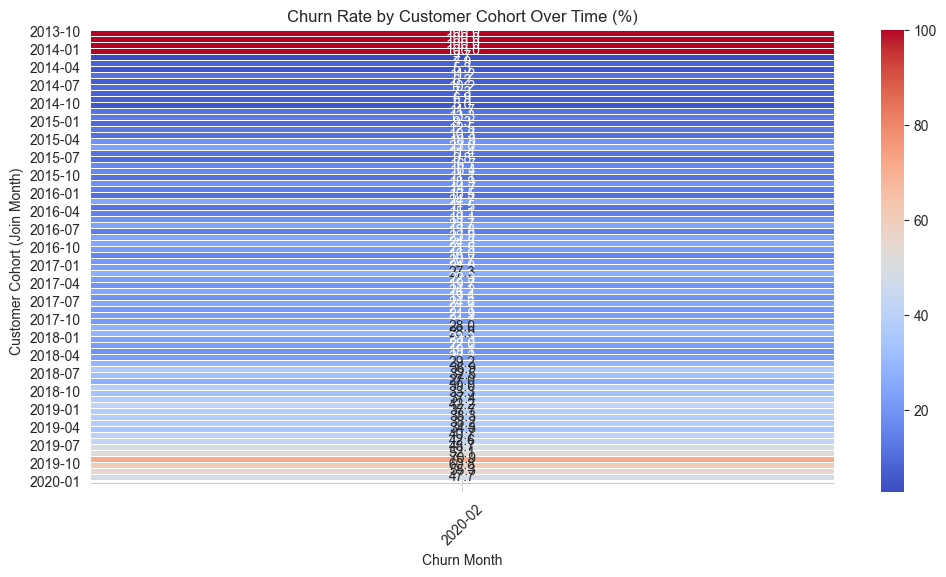

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming it's already in `data_merged`)
df = data_merged.copy()

# Convert dates to datetime format
df["begindate"] = pd.to_datetime(df["begindate"])
df["enddate"] = pd.to_datetime(df["enddate"])

# Extract year-month for cohort grouping
df["cohort"] = df["begindate"].dt.to_period("M")
df["churn_month"] = df["enddate"].dt.to_period("M")

# Filter only customers who churned (exited == 1)
df_churned = df[df["exited"] == 1]

# Create cohort churn matrix (rows: cohorts, cols: churn month)
cohort_churn = df_churned.pivot_table(index="cohort", columns="churn_month", values="customerid", aggfunc="count")

# Normalize by cohort size to get churn rate
cohort_sizes = df.groupby("cohort")["customerid"].count()
cohort_churn = cohort_churn.div(cohort_sizes, axis=0) * 100  # Convert to percentage

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_churn, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Churn Rate by Customer Cohort Over Time (%)")
plt.xlabel("Churn Month")
plt.ylabel("Customer Cohort (Join Month)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_10220\3658039642.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Contract Type", y="Churn Rate", data=churn_rates, palette="viridis")


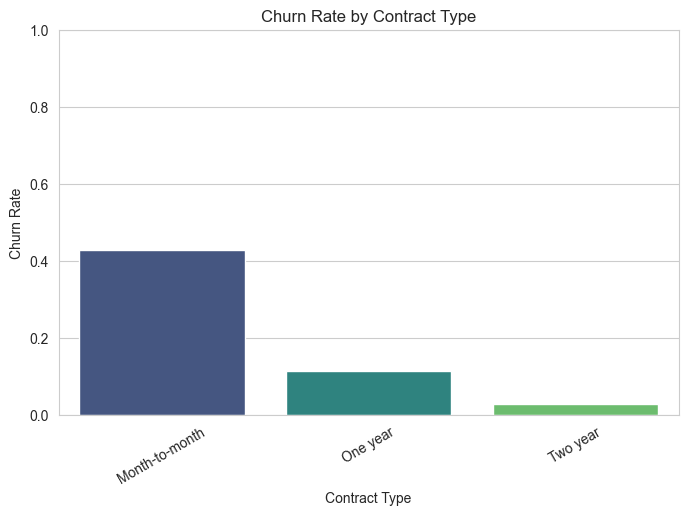

C:\Users\user\AppData\Local\Temp\ipykernel_10220\3658039642.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="tenure_group", y="exited", data=churn_by_tenure, palette="coolwarm")


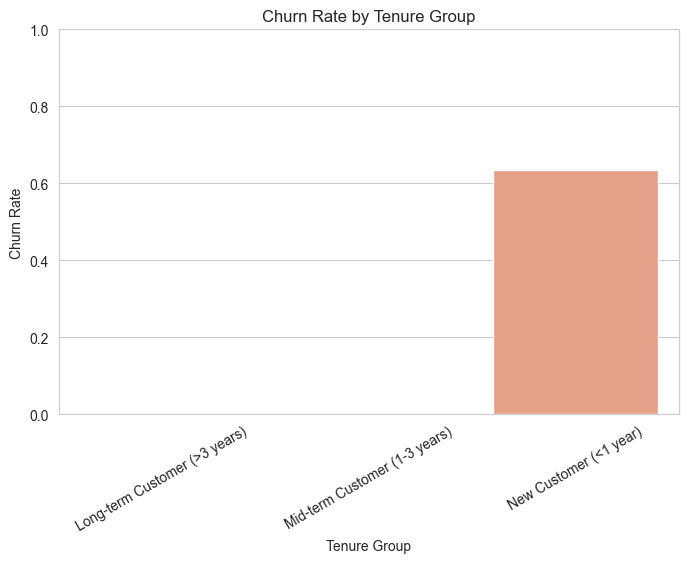

TypeError: agg function failed [how->mean,dtype->object]

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming it's already in `data`)
df = data.copy()

# Convert dates to datetime format
df["begindate"] = pd.to_datetime(df["begindate"])
df["enddate"] = pd.to_datetime(df["enddate"])

# Ensure 'exited' column exists
if "exited" not in df.columns:
    raise ValueError("Column 'exited' (churn indicator) is missing from the dataset.")

# Group customers by contract type instead of missing clusters
churn_rates = df.groupby("type")["exited"].mean().reset_index()
churn_rates.columns = ["Contract Type", "Churn Rate"]

# Visualize churn rates by contract type
plt.figure(figsize=(8, 5))
sns.barplot(x="Contract Type", y="Churn Rate", data=churn_rates, palette="viridis")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.show()

# Define tenure-based customer groups
def tenure_group(months):
    if months < 12:
        return "New Customer (<1 year)"
    elif 12 <= months < 36:
        return "Mid-term Customer (1-3 years)"
    else:
        return "Long-term Customer (>3 years)"

df["tenure_group"] = df["duration_months"].apply(tenure_group)

# Churn rates by tenure group
churn_by_tenure = df.groupby("tenure_group")["exited"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="tenure_group", y="exited", data=churn_by_tenure, palette="coolwarm")
plt.title("Churn Rate by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.show()

# Identify service gaps by contract type instead of cluster
service_cols = [
    "onlinesecurity", "onlinebackup", "deviceprotection", "techsupport", 
    "streamingtv", "streamingmovies", "internet_yes", "multiplelines", "phone_yes"
]

service_gaps = df.groupby("type")[service_cols].mean().T

plt.figure(figsize=(12, 6))
sns.heatmap(service_gaps, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Service Adoption Rates by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Service Feature")
plt.show()


In [149]:
print(data[service_cols].dtypes)


paperlessbilling                          int32
automatic_pay                             int32
gender                                    int32
seniorcitizen                             int64
partner                                   int32
dependents                                int32
internet_yes                              int32
phone_yes                                 int32
internet_phone_yes                        int64
type_One year                              bool
type_Two year                              bool
paymentmethod_Credit card (automatic)      bool
paymentmethod_Electronic check             bool
paymentmethod_Mailed check                 bool
internetservice_Fiber optic                bool
internetservice_no                         bool
onlinesecurity_Yes                         bool
onlinesecurity_no                          bool
onlinebackup_Yes                           bool
onlinebackup_no                            bool
deviceprotection_Yes                    

In [150]:
for col in service_cols:
    if data[col].dtype == 'object':  # Check if column is categorical
        data[col] = data[col].astype('category').cat.codes


In [152]:
data.replace({'Normal': 0, 'Anomaly': 1}, inplace=True)


In [153]:
print(data[service_cols].dtypes)


paperlessbilling                         int32
automatic_pay                            int32
gender                                   int32
seniorcitizen                            int64
partner                                  int32
dependents                               int32
internet_yes                             int32
phone_yes                                int32
internet_phone_yes                       int64
type_One year                             bool
type_Two year                             bool
paymentmethod_Credit card (automatic)     bool
paymentmethod_Electronic check            bool
paymentmethod_Mailed check                bool
internetservice_Fiber optic               bool
internetservice_no                        bool
onlinesecurity_Yes                        bool
onlinesecurity_no                         bool
onlinebackup_Yes                          bool
onlinebackup_no                           bool
deviceprotection_Yes                      bool
deviceprotect

In [154]:
service_gaps = data.groupby("kmeans_cluster")[service_cols].mean().T


C:\Users\user\AppData\Local\Temp\ipykernel_10220\1666526783.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Churn Rate', data=churn_rates, palette='viridis')


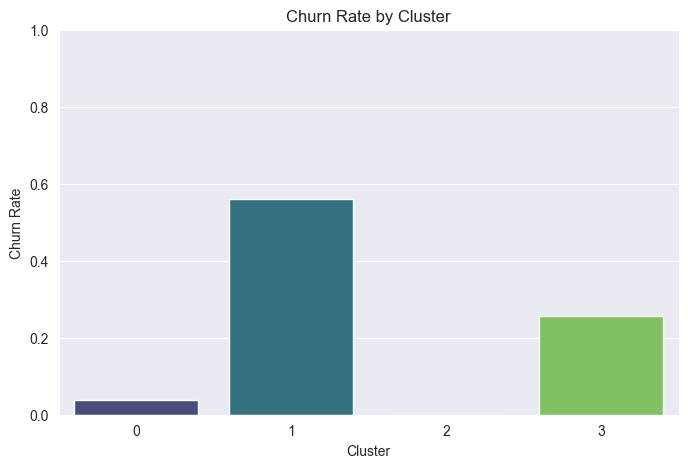

C:\Users\user\AppData\Local\Temp\ipykernel_10220\1666526783.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tenure_group', y='exited', data=churn_by_tenure, palette='coolwarm')


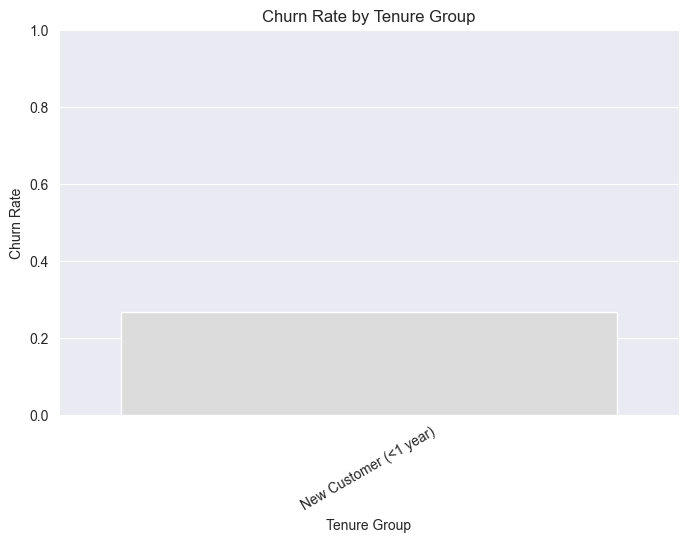

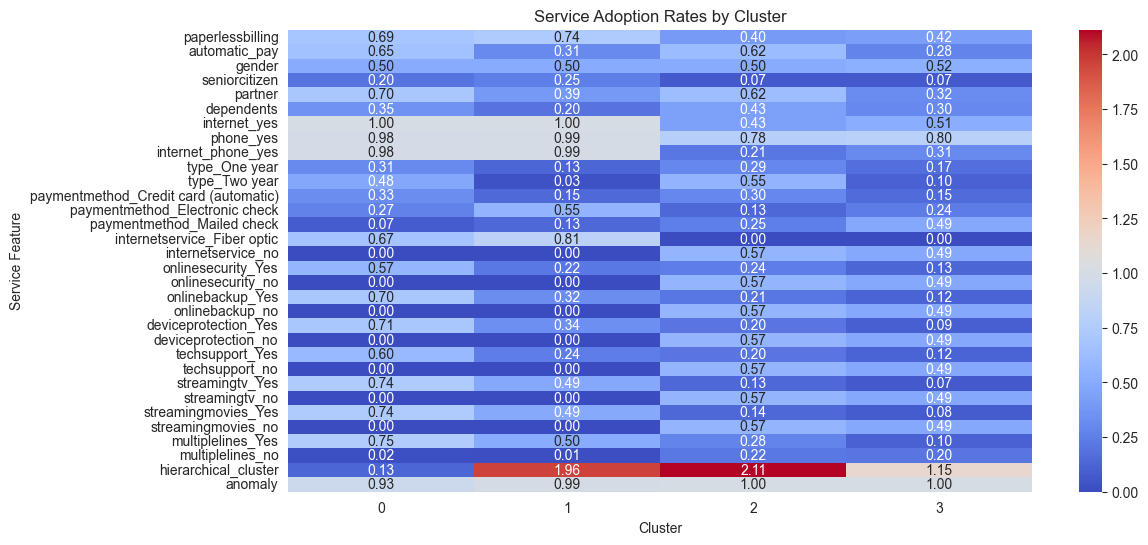

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data is defined before running this script
if 'data' not in globals():
    raise ValueError("Dataset 'data' is not defined. Please load your dataset.")

# Ensure 'exited' column exists and is numeric
if 'exited' not in data.columns:
    raise ValueError("Column 'exited' (churn indicator) is missing from the dataset.")
data['exited'] = pd.to_numeric(data['exited'], errors='coerce').fillna(0).astype(int)

# Ensure 'kmeans_cluster' column exists
if 'kmeans_cluster' not in data.columns:
    raise ValueError("Column 'kmeans_cluster' is missing. Ensure clustering was performed before this step.")

# Compute churn rate per cluster
churn_rates = data.groupby("kmeans_cluster")['exited'].mean().reset_index()
churn_rates.columns = ['Cluster', 'Churn Rate']

# Visualize churn rates by cluster
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Churn Rate', data=churn_rates, palette='viridis')
plt.title("Churn Rate by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.show()

# Ensure 'duration_months' exists
if "duration_months" not in data.columns:
    raise ValueError("Column 'duration_months' is missing. Ensure data preprocessing includes this column.")

# Define tenure-based customer groups
def tenure_group(months):
    if months < 12:
        return "New Customer (<1 year)"
    elif 12 <= months < 36:
        return "Mid-term Customer (1-3 years)"
    else:
        return "Long-term Customer (>3 years)"

data["tenure_group"] = data["duration_months"].apply(tenure_group)

# Churn rates by tenure group
churn_by_tenure = data.groupby("tenure_group")['exited'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='tenure_group', y='exited', data=churn_by_tenure, palette='coolwarm')
plt.title("Churn Rate by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.show()

# Ensure 'numeric_cols' is defined
numeric_cols = ["monthlycharges", "totalcharges", "duration_months"]  # Adjust based on your dataset

# Identify service gaps by cluster
service_cols = [col for col in data.columns if col not in numeric_cols + ['exited', 'kmeans_cluster', 'tenure_group']]
service_gaps = data.groupby("kmeans_cluster")[service_cols].mean().T

plt.figure(figsize=(12, 6))
sns.heatmap(service_gaps, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Service Adoption Rates by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Service Feature")
plt.show()

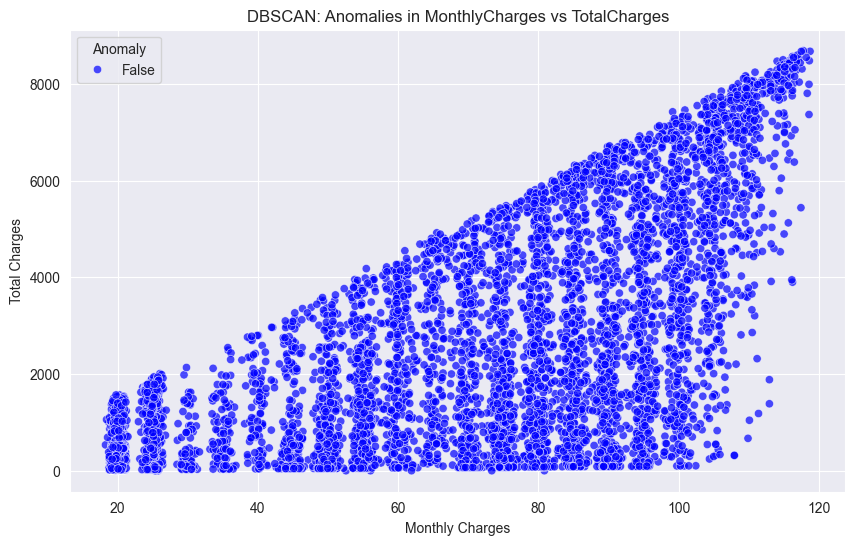

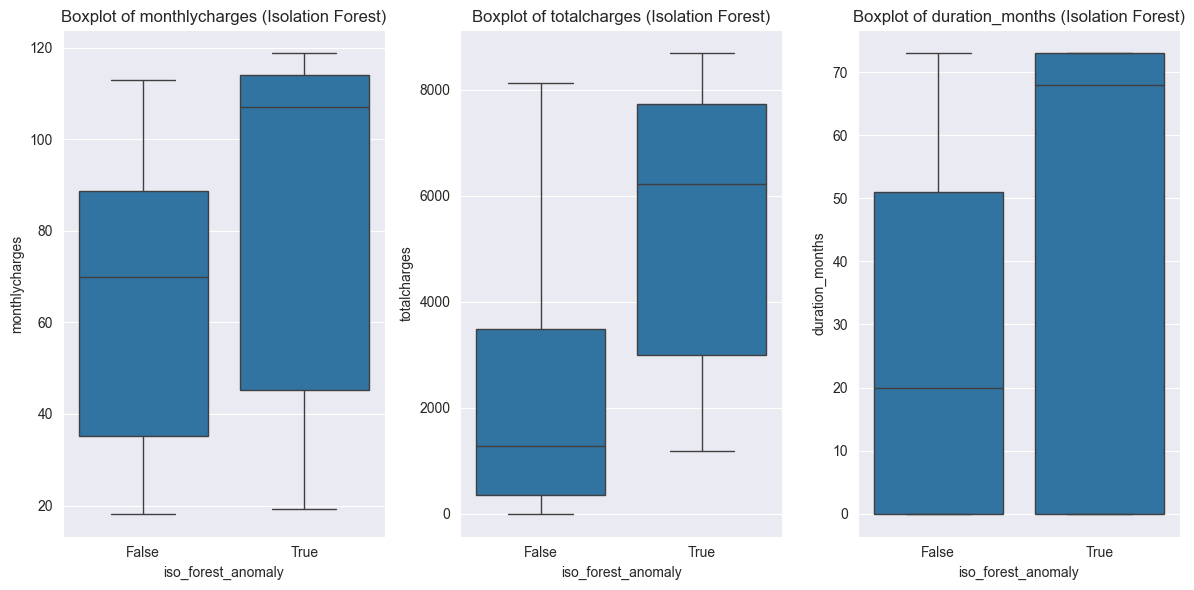

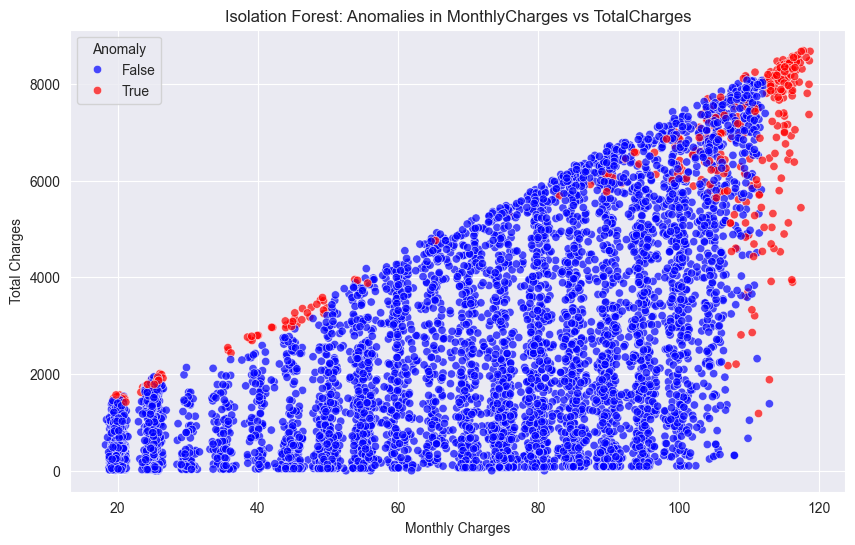

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load dataset
data = data_merged 

# Select relevant features for anomaly detection
features = ['monthlycharges', 'totalcharges', 'duration_months']
data_filtered = data[features].dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

# Apply DBSCAN
dbscan = DBSCAN(eps=1, min_samples=10)
data_filtered['dbscan_labels'] = dbscan.fit_predict(data_scaled)

# Identify anomalies (DBSCAN labels -1 as anomalies)
data_filtered['dbscan_anomaly'] = data_filtered['dbscan_labels'] == -1

# Apply Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
data_filtered['iso_forest_anomaly'] = iso_forest.fit_predict(data_scaled)
data_filtered['iso_forest_anomaly'] = data_filtered['iso_forest_anomaly'] == -1

# Merge anomaly results back to the original dataset
data = data.merge(data_filtered[['dbscan_anomaly', 'iso_forest_anomaly']], left_index=True, right_index=True, how='left')

# Visualize DBSCAN anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_filtered['monthlycharges'], y=data_filtered['totalcharges'], hue=data_filtered['dbscan_anomaly'], palette={True: 'red', False: 'blue'}, alpha=0.7)
plt.title('DBSCAN: Anomalies in MonthlyCharges vs TotalCharges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Anomaly')
plt.show()

# Visualize Isolation Forest anomalies using box plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data_filtered[col], x=data_filtered['iso_forest_anomaly'].astype(str))
    plt.title(f'Boxplot of {col} (Isolation Forest)')
plt.tight_layout()
plt.show()

# Scatter plot of Isolation Forest anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_filtered['monthlycharges'], y=data_filtered['totalcharges'], hue=data_filtered['iso_forest_anomaly'], palette={True: 'red', False: 'blue'}, alpha=0.7)
plt.title('Isolation Forest: Anomalies in MonthlyCharges vs TotalCharges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Anomaly')
plt.show()

# Save results
data.to_csv('customer_anomalies.csv', index=False)


Epoch 1/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 1.1495 - val_loss: 0.6390
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6493 - val_loss: 0.5754
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5846 - val_loss: 0.5248
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5288 - val_loss: 0.4957
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5172 - val_loss: 0.4948
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5090 - val_loss: 0.4941
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5150 - val_loss: 0.4939
Epoch 8/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5196 - val_loss: 0.4934
Epoch 9/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5115 - val_loss: 0.4931
Epoch 10/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5104 - val_loss: 0.4931
Epoch 11/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5147 - val_loss: 0.4930
Epoch 12/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st

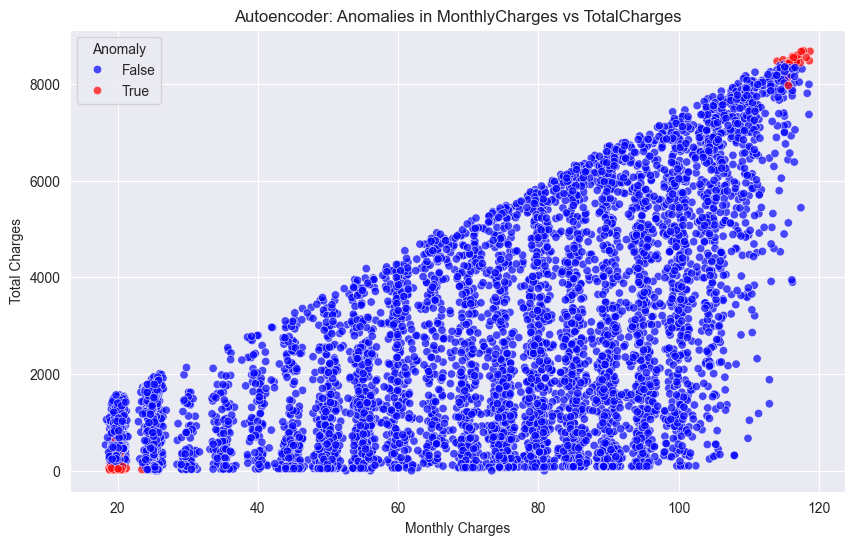

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # type: ignore

# Load dataset
data = data_merged # Update with actual file path

# Select relevant features for anomaly detection
features = ['monthlycharges', 'totalcharges', 'duration_months']
data_filtered = data[features].dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

# Apply DBSCAN
dbscan = DBSCAN(eps=1, min_samples=10)
data_filtered['dbscan_labels'] = dbscan.fit_predict(data_scaled)

# Identify anomalies (DBSCAN labels -1 as anomalies)
data_filtered['dbscan_anomaly'] = data_filtered['dbscan_labels'] == -1

# Apply Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
data_filtered['iso_forest_anomaly'] = iso_forest.fit_predict(data_scaled)
data_filtered['iso_forest_anomaly'] = data_filtered['iso_forest_anomaly'] == -1

# Autoencoder model
def build_autoencoder(input_dim):
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(16, activation='relu')(input_layer)
    encoded = layers.Dense(8, activation='relu')(encoded)
    encoded = layers.Dense(4, activation='relu')(encoded)
    decoded = layers.Dense(8, activation='relu')(encoded)
    decoded = layers.Dense(16, activation='relu')(decoded)
    decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)
    autoencoder = keras.Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Train autoencoder
input_dim = data_scaled.shape[1]
autoencoder = build_autoencoder(input_dim)
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.1, verbose=1)

# Compute reconstruction errors
reconstructions = autoencoder.predict(data_scaled)
mse = np.mean(np.power(data_scaled - reconstructions, 2), axis=1)
threshold = np.percentile(mse, 95)  # Define anomaly threshold
data_filtered['autoencoder_anomaly'] = mse > threshold

# Merge anomaly results back to the original dataset
data = data.merge(data_filtered[['dbscan_anomaly', 'iso_forest_anomaly', 'autoencoder_anomaly']], left_index=True, right_index=True, how='left')

# Visualize Autoencoder anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_filtered['monthlycharges'], y=data_filtered['totalcharges'], hue=data_filtered['autoencoder_anomaly'], palette={True: 'red', False: 'blue'}, alpha=0.7)
plt.title('Autoencoder: Anomalies in MonthlyCharges vs TotalCharges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Anomaly')
plt.show()

# Save results
data.to_csv('customer_anomalies_with_autoencoder.csv', index=False)



<h2 style="color:blue;">5.Segmentation Analysis for Retention Strategies</h2>


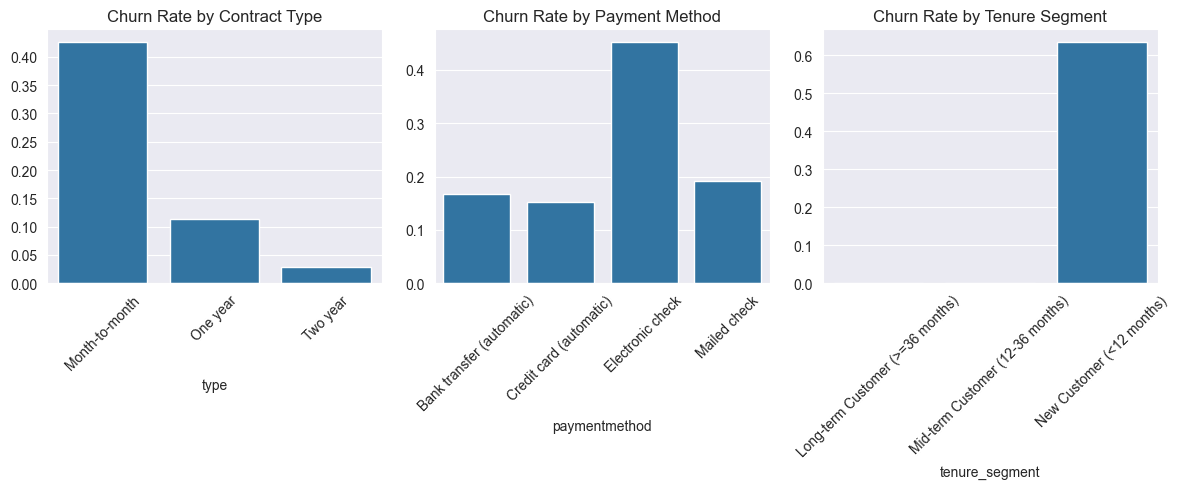

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = data_merged  # Update with actual file path

# Segment by Tenure
def tenure_segment(months):
    if months < 12:
        return 'New Customer (<12 months)'
    elif 12 <= months < 36:
        return 'Mid-term Customer (12-36 months)'
    else:
        return 'Long-term Customer (>=36 months)'

data['tenure_segment'] = data['duration_months'].apply(tenure_segment)

# Group by demographics and service usage
churn_by_contract = data.groupby('type')['exited'].mean()
churn_by_payment = data.groupby('paymentmethod')['exited'].mean()
churn_by_tenure = data.groupby('tenure_segment')['exited'].mean()
churn_by_services = data.groupby(['onlinesecurity', 'onlinebackup', 'techsupport'])['exited'].mean()

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.barplot(x=churn_by_contract.index, y=churn_by_contract.values)
plt.title('Churn Rate by Contract Type')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x=churn_by_payment.index, y=churn_by_payment.values)
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x=churn_by_tenure.index, y=churn_by_tenure.values)
plt.title('Churn Rate by Tenure Segment')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Save results
data.to_csv('customer_segmentation.csv', index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_10220\2796823241.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = data.groupby(column)['exited'].mean() * 100
C:\Users\user\AppData\Local\Temp\ipykernel_10220\2796823241.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_contract.index, y=churn_by_contract.values, palette='coolwarm')
C:\Users\user\AppData\Local\Temp\ipykernel_10220\2796823241.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_payment.index, y=churn_

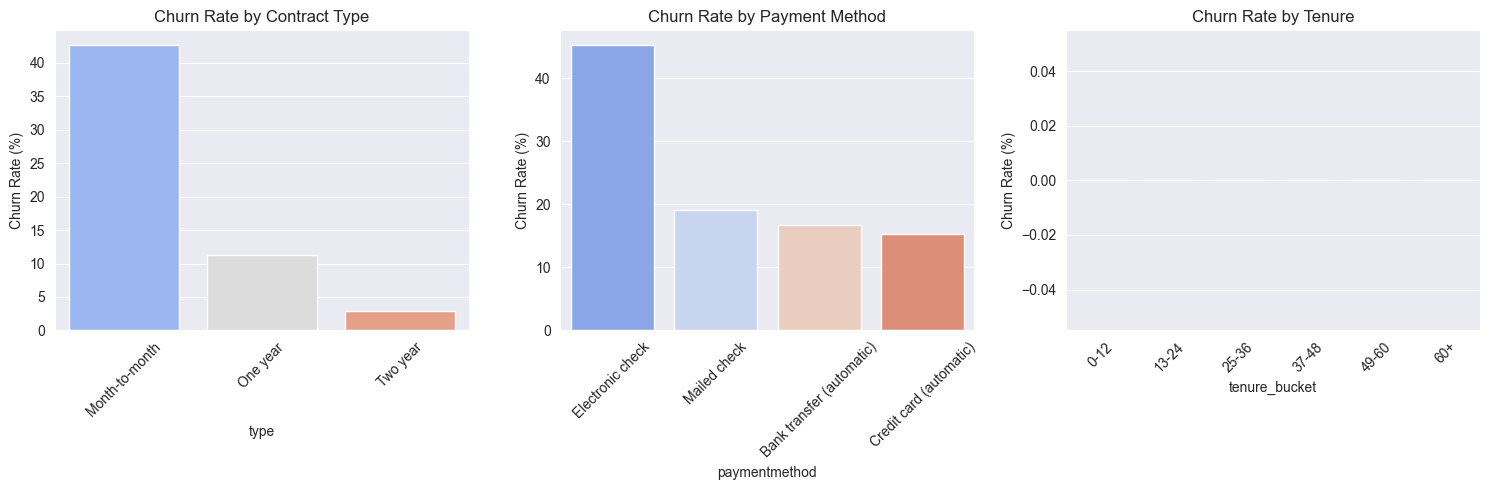

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = data_merged  # Update with actual file path

# Define segments
segments = ['type', 'paymentmethod', 'duration_months']

# Function to calculate churn rate for each segment
def calculate_churn_rate(data, column):
    churn_rates = data.groupby(column)['exited'].mean() * 100
    return churn_rates.sort_values(ascending=False)

# Calculate churn rate for contract type, payment method, and tenure buckets
data['tenure_bucket'] = pd.cut(data['duration_months'], bins=[0, 12, 24, 36, 48, 60, data['duration_months'].max()],
                               labels=['0-12', '13-24', '25-36', '37-48', '49-60', '60+'])

churn_by_contract = calculate_churn_rate(data, 'type')
churn_by_payment = calculate_churn_rate(data, 'paymentmethod')
churn_by_tenure = calculate_churn_rate(data, 'tenure_bucket')

# Visualization
plt.figure(figsize=(15, 5))

# Churn by Contract Type
plt.subplot(1, 3, 1)
sns.barplot(x=churn_by_contract.index, y=churn_by_contract.values, palette='coolwarm')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

# Churn by Payment Method
plt.subplot(1, 3, 2)
sns.barplot(x=churn_by_payment.index, y=churn_by_payment.values, palette='coolwarm')
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

# Churn by Tenure Bucket
plt.subplot(1, 3, 3)
sns.barplot(x=churn_by_tenure.index, y=churn_by_tenure.values, palette='coolwarm')
plt.title('Churn Rate by Tenure')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_10220\2185917917.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = data.groupby(column)['exited'].mean() * 100
C:\Users\user\AppData\Local\Temp\ipykernel_10220\2185917917.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_data = data.groupby(column).agg({'exited': 'mean', 'monthlycharges': 'mean', 'customerid': 'count'})
C:\Users\user\AppData\Local\Temp\ipykernel_10220\2185917917.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

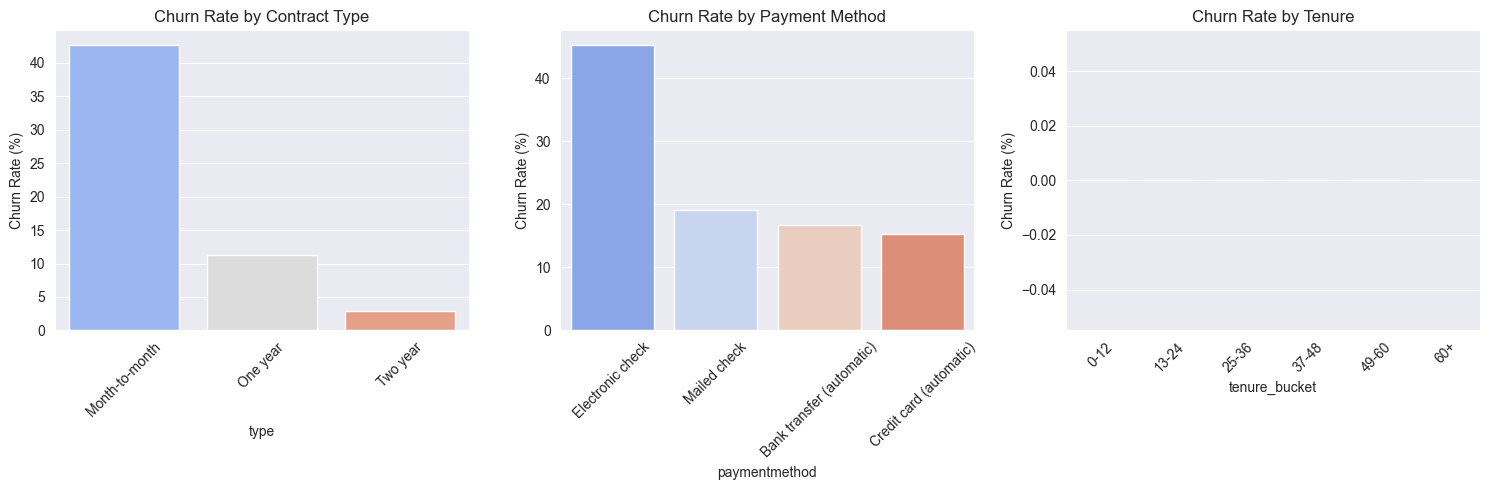

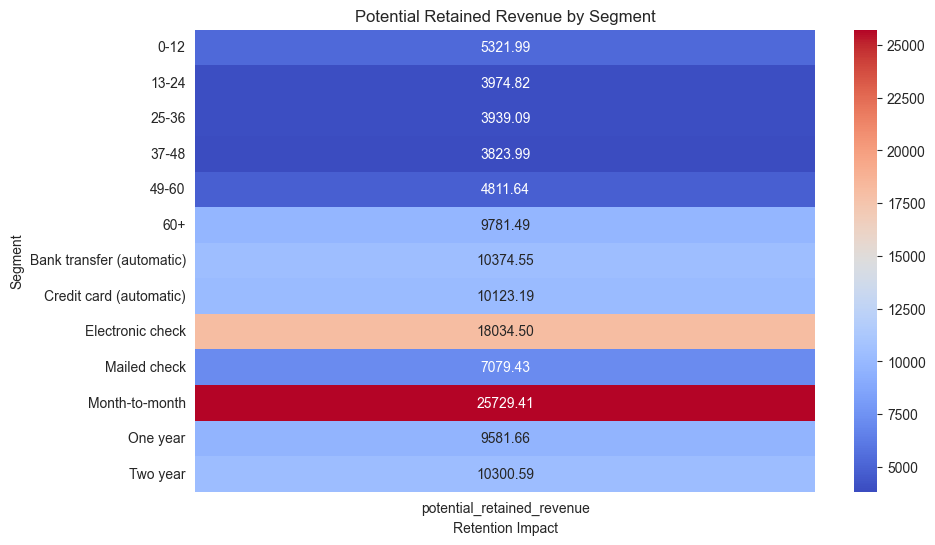

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = data_merged # Update with actual file path

# Define segments
segments = ['type', 'paymentmethod', 'duration_months']

# Function to calculate churn rate for each segment
def calculate_churn_rate(data, column):
    churn_rates = data.groupby(column)['exited'].mean() * 100
    return churn_rates.sort_values(ascending=False)

# Function to estimate retained revenue
def estimate_retained_revenue(data, column, improvement_factor=0.1):
    churn_data = data.groupby(column).agg({'exited': 'mean', 'monthlycharges': 'mean', 'customerid': 'count'})
    churn_data['potential_retained_customers'] = churn_data['customerid'] * improvement_factor
    churn_data['potential_retained_revenue'] = churn_data['potential_retained_customers'] * churn_data['monthlycharges']
    return churn_data[['potential_retained_customers', 'potential_retained_revenue']]

# Calculate churn rate for contract type, payment method, and tenure buckets
data['tenure_bucket'] = pd.cut(data['duration_months'], bins=[0, 12, 24, 36, 48, 60, data['duration_months'].max()],
                               labels=['0-12', '13-24', '25-36', '37-48', '49-60', '60+'])

churn_by_contract = calculate_churn_rate(data, 'type')
churn_by_payment = calculate_churn_rate(data, 'paymentmethod')
churn_by_tenure = calculate_churn_rate(data, 'tenure_bucket')

# Estimate retention impact and revenue
retention_contract = estimate_retained_revenue(data, 'type')
retention_payment = estimate_retained_revenue(data, 'paymentmethod')
retention_tenure = estimate_retained_revenue(data, 'tenure_bucket')

# Visualization
plt.figure(figsize=(15, 5))

# Churn by Contract Type
plt.subplot(1, 3, 1)
sns.barplot(x=churn_by_contract.index, y=churn_by_contract.values, palette='coolwarm')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

# Churn by Payment Method
plt.subplot(1, 3, 2)
sns.barplot(x=churn_by_payment.index, y=churn_by_payment.values, palette='coolwarm')
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

# Churn by Tenure Bucket
plt.subplot(1, 3, 3)
sns.barplot(x=churn_by_tenure.index, y=churn_by_tenure.values, palette='coolwarm')
plt.title('Churn Rate by Tenure')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Heatmap for retention impact
retention_summary = pd.concat([retention_contract, retention_payment, retention_tenure])
plt.figure(figsize=(10, 6))
sns.heatmap(retention_summary.pivot_table(values='potential_retained_revenue', index=retention_summary.index, aggfunc='sum'), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Potential Retained Revenue by Segment')
plt.ylabel('Segment')
plt.xlabel('Retention Impact')
plt.show()



<h3 style="color:blue;">LOGISTIC REGRESSION</h3>

 Accuracy: 0.9801
 AUC-ROC: 0.9979

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1035
           1       0.96      0.97      0.96       374

    accuracy                           0.98      1409
   macro avg       0.97      0.98      0.97      1409
weighted avg       0.98      0.98      0.98      1409



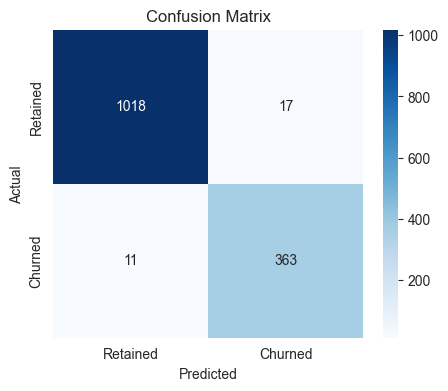

In [242]:
# PERFORM Logistic REGRESSION 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Load dataset (Assuming it's already in df)
df = data_merged

# Drop 'customerID' since it's not useful for prediction
#df.drop(columns=["customerID"], inplace=True)

# Convert date columns to datetime format
df["BeginDate"] = pd.to_datetime(df["BeginDate"])
df["EndDate"] = pd.to_datetime(df["EndDate"])

# Convert categorical columns to strings
cat_cols = ["Type", "PaperlessBilling", "PaymentMethod", 
            "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", 
            "StreamingTV", "StreamingMovies", "internet_yes", "MultipleLines", "phone_yes"]

df[cat_cols] = df[cat_cols].astype(str)

# Separate features and target
X = df.drop(columns=["exited"])  # Features
y = df["exited"]                 # Target (Churn)

# Identify numerical and categorical features
num_features = ["MonthlyCharges", "TotalCharges", "duration_months"]
cat_features = cat_cols

# Preprocessing Pipelines
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression Model
model = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Train Model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f" Accuracy: {accuracy:.4f}")
print(f" AUC-ROC: {roc_auc:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Retained", "Churned"], yticklabels=["Retained", "Churned"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



<h3 style="color:blue;">DECISION TREE ALGORITHM</h3>

Accuracy: 0.70
AUC-ROC: 0.78
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      1036
           1       0.46      0.74      0.57       373

    accuracy                           0.70      1409
   macro avg       0.67      0.71      0.67      1409
weighted avg       0.77      0.70      0.71      1409



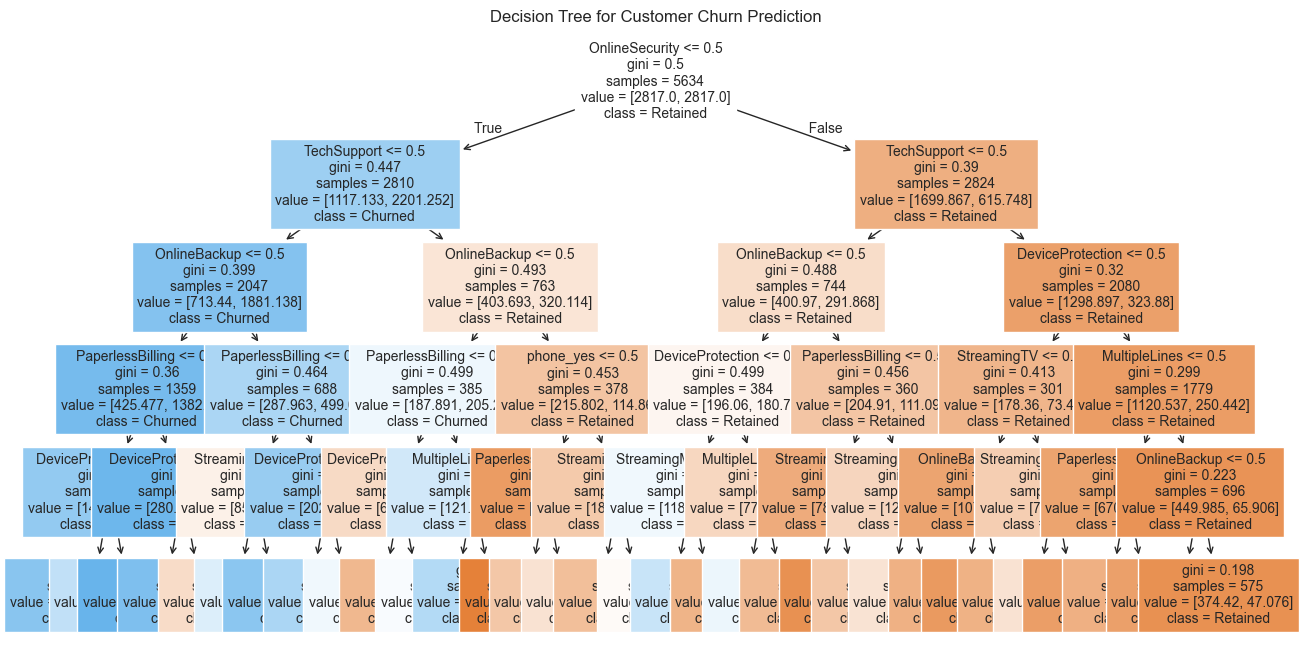

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load dataset (replace with actual dataset path if needed)
df = data_merged

# Select only columns with Yes/No and True/False values
binary_cols = ["PaperlessBilling", "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
               "TechSupport", "StreamingTV", "StreamingMovies", "internet_yes", 
               "MultipleLines", "phone_yes", "internet_phone_yes"]

# Encode categorical binary columns (Yes/No to 1/0)
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, True: 1, False: 0})

# Define features (X) and target (y)
X = df[binary_cols]
y = df["exited"]  # Target variable (1 = churned, 0 = retained)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight="balanced")
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")
print(classification_report(y_test, y_pred))

# Visualizing the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt_model, feature_names=binary_cols, class_names=["Retained", "Churned"], filled=True, fontsize=10)
plt.title("Decision Tree for Customer Churn Prediction")
plt.show()






<h3 style="color:blue;">EVALUATION USING K-FOLD CROSS-VALIDATION </h3>
<h3 style="color:blue;"> LOGISTIC REGRESSION</h3>


In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Load dataset
df = data_merged.copy()


# Convert categorical columns to strings
cat_cols = ["Type", "PaperlessBilling", "PaymentMethod", 
            "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", 
            "StreamingTV", "StreamingMovies", "internet_yes", "MultipleLines", "phone_yes"]

df[cat_cols] = df[cat_cols].astype(str)

# Separate features and target
X = df.drop(columns=["exited"])  # Features
y = df["exited"]                 # Target (Churn)

# Identify numerical and categorical features
num_features = ["MonthlyCharges", "TotalCharges", "duration_months"]
cat_features = cat_cols

# Preprocessing Pipelines
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Logistic Regression Model with Pipeline
model = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
cv_auc = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

# Print Evaluation Metrics
print(f"Cross-Validation Accuracy Scores: {cv_accuracy}")
print(f"Mean Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Cross-Validation AUC-ROC Scores: {cv_auc}")
print(f"Mean AUC-ROC: {cv_auc.mean():.4f} ± {cv_auc.std():.4f}")


Cross-Validation Accuracy Scores: [0.97232079 0.98367637 0.97444996 0.97017045 0.97514205]
Mean Accuracy: 0.9752 ± 0.0046
Cross-Validation AUC-ROC Scores: [0.99767356 0.99882083 0.99790482 0.99724765 0.99795467]
Mean AUC-ROC: 0.9979 ± 0.0005



<h3 style="color:blue;">RANDOM FOREST ALGORITHM</h3>

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


df = data_merged.copy()

# Select only columns with Yes/No and True/False values
binary_cols = ["PaperlessBilling", "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
               "TechSupport", "StreamingTV", "StreamingMovies", "internet_yes", 
               "MultipleLines", "phone_yes", "internet_phone_yes"]

# Encode categorical binary columns (Yes/No to 1/0)
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, True: 1, False: 0})

# Define features (X) and target (y)
X = df[binary_cols]
y = df["exited"]  # Target variable (1 = churned, 0 = retained)

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight="balanced")

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_accuracy = cross_val_score(dt_model, X, y, cv=kf, scoring='accuracy')
cv_auc = cross_val_score(dt_model, X, y, cv=kf, scoring='roc_auc')

# Print Evaluation Metrics
print(f"Cross-Validation Accuracy Scores: {cv_accuracy}")
print(f"Mean Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Cross-Validation AUC-ROC Scores: {cv_auc}")
print(f"Mean AUC-ROC: {cv_auc.mean():.4f} ± {cv_auc.std():.4f}")


Cross-Validation Accuracy Scores: [0.69765791 0.69481902 0.682044   0.69389205 0.70525568]
Mean Accuracy: 0.6947 ± 0.0075
Cross-Validation AUC-ROC Scores: [0.78379155 0.7917306  0.76181503 0.75577014 0.7630156 ]
Mean AUC-ROC: 0.7712 ± 0.0140



  
 
 <h3 style="color:blue;"> APPLY PERFORMANCE ACCURACY METRICS ON THE MODELS</h3>
 <h3 style="color:blue;"> LOGISTIC REGRESSION</h3>

Cross-Validation Accuracy Scores: [0.97232079 0.98367637 0.97444996 0.97017045 0.97514205]
Mean Accuracy: 0.9752 ± 0.0046
Cross-Validation AUC-ROC Scores: [0.99767356 0.99882083 0.99790482 0.99724765 0.99795467]
Mean AUC-ROC: 0.9979 ± 0.0005

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5174
           1       0.94      0.97      0.95      1869

    accuracy                           0.98      7043
   macro avg       0.96      0.97      0.97      7043
weighted avg       0.98      0.98      0.98      7043



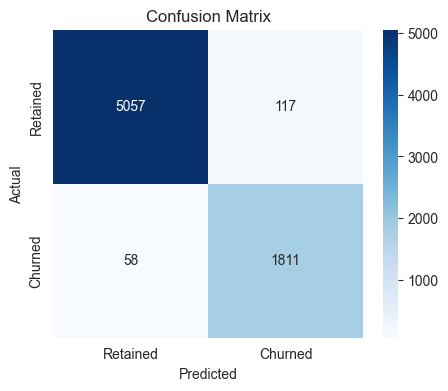

In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Load dataset
df = data_merged.copy()

# Convert categorical columns to strings
cat_cols = ["Type", "PaperlessBilling", "PaymentMethod", 
            "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", 
            "StreamingTV", "StreamingMovies", "internet_yes", "MultipleLines", "phone_yes"]

df[cat_cols] = df[cat_cols].astype(str)

# Separate features and target
X = df.drop(columns=["exited"])  # Features
y = df["exited"]                 # Target (Churn)

# Identify numerical and categorical features
num_features = ["MonthlyCharges", "TotalCharges", "duration_months"]
cat_features = cat_cols

# Preprocessing Pipelines
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Logistic Regression Model with Pipeline
model = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
cv_auc = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

# Generate predictions using cross-validation
y_pred_cv = cross_val_predict(model, X, y, cv=kf)

# Compute classification report
classification_rep = classification_report(y, y_pred_cv)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred_cv)

# Print Performance Metrics
print(f"Cross-Validation Accuracy Scores: {cv_accuracy}")
print(f"Mean Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Cross-Validation AUC-ROC Scores: {cv_auc}")
print(f"Mean AUC-ROC: {cv_auc.mean():.4f} ± {cv_auc.std():.4f}")
print("\n📊 Classification Report:")
print(classification_rep)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Retained", "Churned"], yticklabels=["Retained", "Churned"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




 
 <h3 style="color:blue;">PERFORMING ACCURACY METRICS ON THE MODELS</h3>
 <h3 style="color:blue;">DECISION TREE ALGORITHM</h3>

Cross-Validation Accuracy Scores: [0.69765791 0.69481902 0.682044   0.69389205 0.70525568]
Mean Accuracy: 0.6947 ± 0.0075
Cross-Validation AUC-ROC Scores: [0.78379155 0.7917306  0.76181503 0.75577014 0.7630156 ]
Mean AUC-ROC: 0.7712 ± 0.0140

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.68      0.76      5174
           1       0.45      0.75      0.57      1869

    accuracy                           0.69      7043
   macro avg       0.67      0.71      0.67      7043
weighted avg       0.77      0.69      0.71      7043



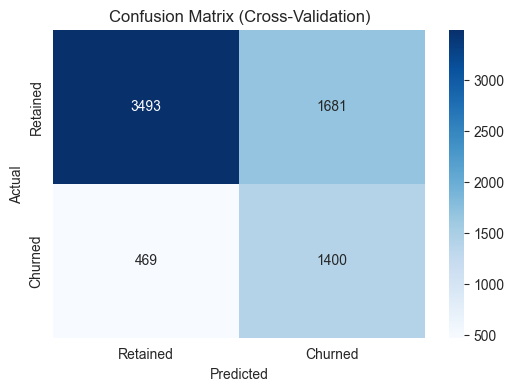

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Load dataset
df = data_merged.copy()

# Select only columns with Yes/No and True/False values
binary_cols = ["PaperlessBilling", "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
               "TechSupport", "StreamingTV", "StreamingMovies", "internet_yes", 
               "MultipleLines", "phone_yes", "internet_phone_yes"]

# Encode categorical binary columns (Yes/No to 1/0)
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, True: 1, False: 0})

# Define features (X) and target (y)
X = df[binary_cols]
y = df["exited"]  # Target variable (1 = churned, 0 = retained)

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight="balanced")

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation and Get Predictions
cv_accuracy = cross_val_score(dt_model, X, y, cv=kf, scoring='accuracy')
cv_auc = cross_val_score(dt_model, X, y, cv=kf, scoring='roc_auc')

# Get predicted labels and probabilities for the overall classification report
y_pred = cross_val_predict(dt_model, X, y, cv=kf)
y_prob = cross_val_predict(dt_model, X, y, cv=kf, method='predict_proba')[:, 1]

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)

# Print Evaluation Metrics
print(f"Cross-Validation Accuracy Scores: {cv_accuracy}")
print(f"Mean Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Cross-Validation AUC-ROC Scores: {cv_auc}")
print(f"Mean AUC-ROC: {cv_auc.mean():.4f} ± {cv_auc.std():.4f}")

print("\n📊 Classification Report:")
print(classification_report(y, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Retained", "Churned"], yticklabels=["Retained", "Churned"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Cross-Validation)")
plt.show()


### Evaluate Results of EDA

Analyze our dataset's characteristics:

- Feature Size: Do we have a small or large number of features?
- Feature Relationships: Do we expect linear or non-linear relationships?
- Dataset Size: Do we have thousands or millions of records?
- Class Balance: Is churn highly imbalanced?
- Training Time: Do we need quick iteration or deep tuning?
- Overfitting Risk: Are we at risk of a complex model memorizing data?


#### Accuracy Requirements
Following are the assessment requirements:
- Primary metric: AUC-ROC.
- Additional metric: Accuracy.
- Assessment criteria:
    - AUC-ROC < 0.75 — 0 SP
    - 0.75 ≤ AUC-ROC < 0.81 — 4 SP
    - 0.81 ≤ AUC-ROC < 0.85 — 4.5 SP
    - 0.85 ≤ AUC-ROC < 0.87 — 5 SP
    - 0.87 ≤ AUC-ROC < 0.88 — 5.5 SP
    - AUC-ROC ≥ 0.88 — 6 SP

#### Compare EDA Results Against Supervised ML Models

***********NEED TO UPDATE CHART AFTER EDA 

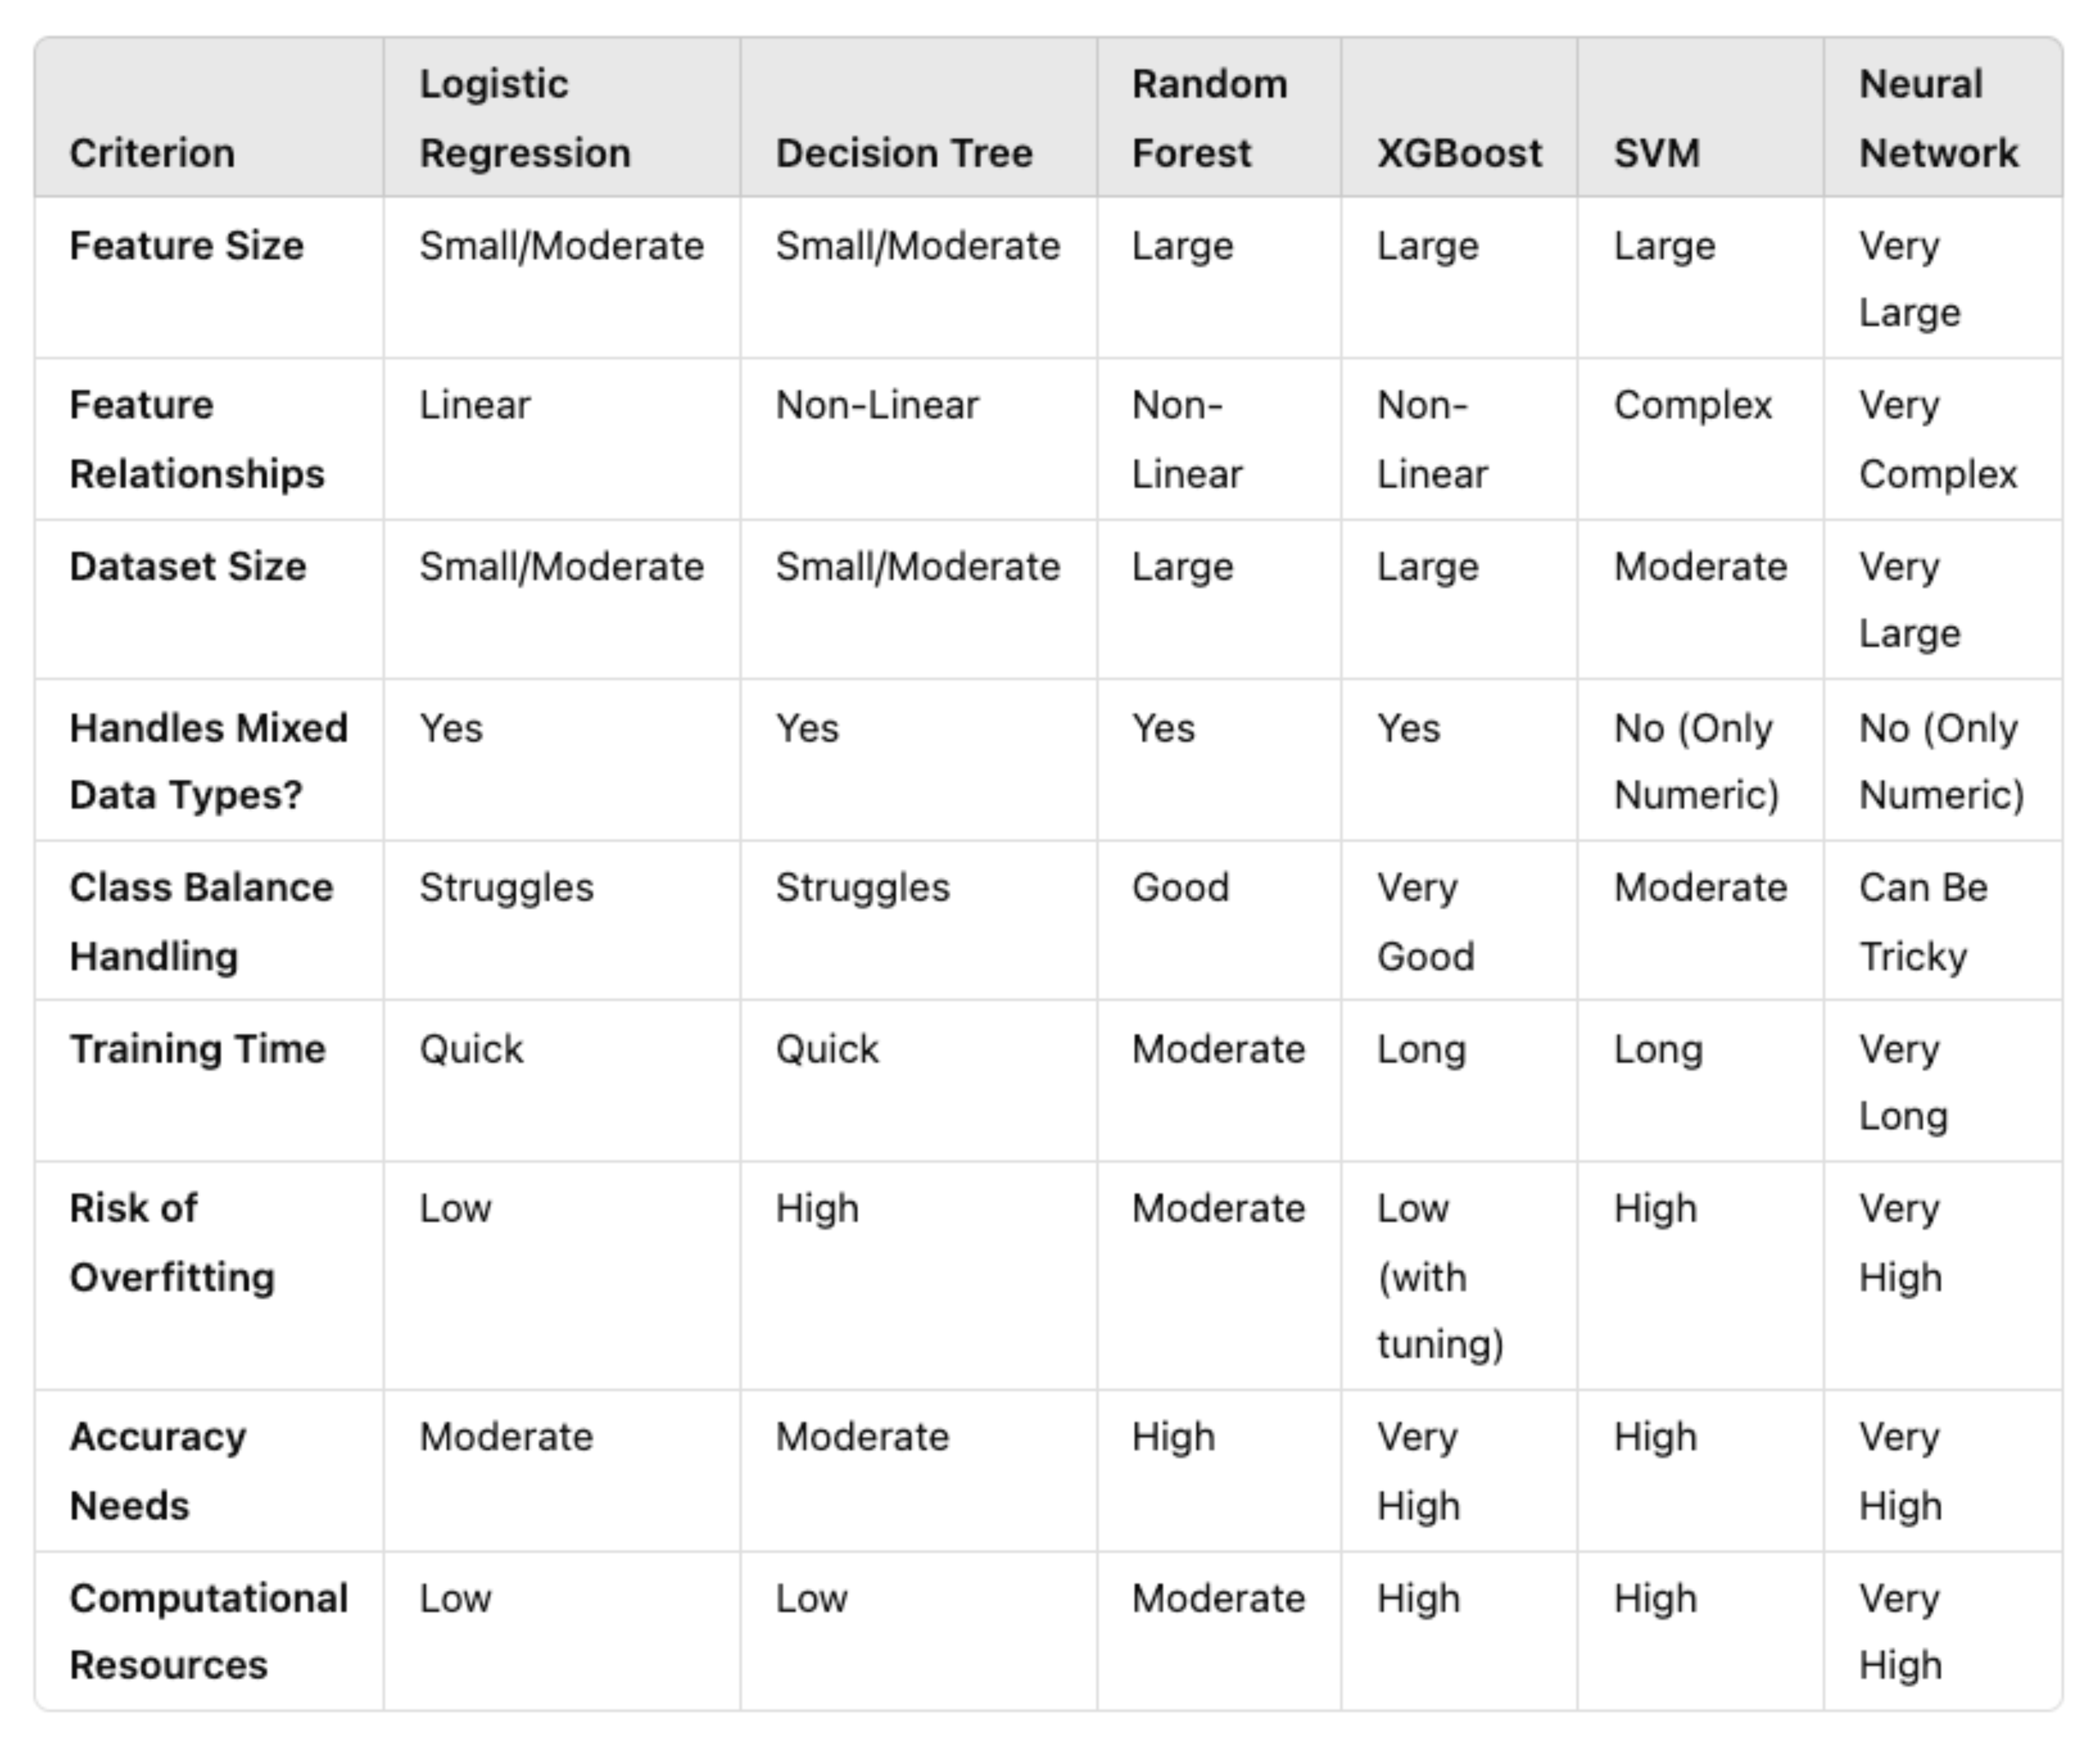

 
 


#### EDA Conclusion: 

***********NEED TO UPDATE CHART AFTER EDA 

The following predidctive classification models are best suited for this use case: 
- Baseline models:
    - Logistic regression: The dataset is small and relationships are linear, so will use this as a baseline.
    - Decision trees: Will also train a decision tree model to help us better understand the model.
- Then will train a more advanced model: 
    - Random forest: Will train a random forest model as we have many features with non-linear relationships.
 
 

## Questions for the Reviewer
1. Which types of payments are automated vs not?

Automated payments include Bank transfer and Credit card .

Non-automated payments include Electronic check and Mailed check which requires manual action

2. What would be the expected approach to handle columns with missing values?

For numerical columns,missing values can be filled with labesl such as 'Unknown' to retain the info.

Alternatively,rows having excess missing values can be dropped.

2a. Do NaN vaues in InternetService mean the customerID is ........


There is a possibilty that the does not have internet service.This can be confirmed by checking the internet_yes column is 'no' for such cusytomers

2b. We are assuming the NaN value in the EndDate column represents customers still under contract.

Is this correct or do you recommend an alternative?

This likely means the customer is still an active subscriber.

A better approach would be to replace NaN values with 'Active' to clearly indicate ongoing contracts or anaother column can be created with values like 'Active' or 'Ended'.

2c. 


## The Plan to Developing the Supervised ML Model

### Purpose
To develop a supervised ML model to predict churn. Once those likely to leave are identified, then we want to recommend to those customers features that will likely encourage them to remain on their respective contracts.


### Approach to Predicting Churn

#### Prepare data for the modeling
1. Feature selection
2. Split data

#### Baseline model
1. Start simple with a Logistic Regression and Decision Tree to baseline performance.

#### Second model
1. Use the Random Forest Ensemble Model for higher accuracy if the baseline models are not performing well.
2. Apply techniques to handle imbalanced data:  ************ DO WE NEED THIS?
    - Oversampling: Synthetic Minority Oversampling Technique (SMOTE)
    - Class weights: Adjust weights for the minority class in the loss function
#### Evaluate models
1. Evaluate models using k-fold cross-validation to ensure robustness.
2. Apply performance metrics:
    - Accuracy: overvall peformance
    - Precision/recall/F1-score: for imbalanced classes
    - ROC-AUC: ability to distinguish between classes

### Which Features To Offer To Convince Them to Stay

***********NEED THIS FROM EDA RESULTS




## Results of Models
....

## Additional Analysis (if desired)
Explore other datasets such as customer reviews, complaints, or feedback or customer service logs that we can analyze using machine learning models for text data (NLP) in the following ways:
1. Sentiment analysis: Extract sentiment score from customer feedback and analyze the impact on churn (VADER, TextBlob to categorize positive vs negative reviews). Use bar charts to visualize the sentiment distribution by churn status.
2. Clustering or Topic modeling (LDA): Identify and group common reasons for customer complains / dissatifcation.
3. Keyword extraction: Detect keywords associated with high-risk customers (e.g., "bad service," "cancel subscription"). (Use TF-IDF or Word Embeddings (BERT, Word2Vec) to convert text into numerical form.) Use word clouds to display the most common words in churned vs retained customers' feedback.




# IGNORE FOR NOW: Other Analyses / Notes to Potentially Incorporate

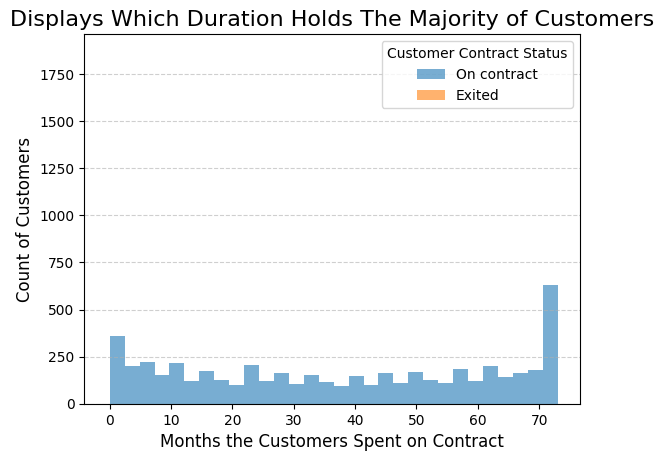

The majority of customers exited their contracts within the first two months. The majority of the customers who remained on contract stayed longer than 70 months. 


In [31]:
# Question #1: 1. What % of customers are staying / leaving by duration? (HISTOGRAM)

# Histogram plot (for duration frequency): each bin represents each duration range; height of bin reflects the actual count of customers spent in that duration

# Split Data by Groups
groups = data_merged['exited'].unique()  # Unique groups ('A', 'B')

# Plot Histograms for Each Group
for group in groups:
    subset = data_merged[data_merged['exited'] == group]  # Filter data by group
    plt.hist(subset['duration_months'], bins=30, alpha=0.6, label=f'Group {group}')  # Add label for legend

    # Customize Legend Labels
'''custom_labels = ['On contract', 'Exited']
handles, _ = plt.gca().get_legend_handles_labels()  # Get current handles and labels
plt.legend(handles, custom_labels, title='Customer Contract Status', fontsize=10)'''


# Add Legend, Title, and Labels
plt.title('Displays Which Duration Holds The Majority of Customers', fontsize=16)
plt.xlabel('Months the Customers Spent on Contract', fontsize=12)
plt.ylabel('Count of Customers', fontsize=12)
plt.legend(['On contract', 'Exited'],title='Customer Contract Status', fontsize=10)  # Add a legend with a title
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
    
    
'''sns.histplot(data_merged['duration_months'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Displays Which Duration Holds The Majority of Customers', fontsize=16)
plt.xlabel('Months the Customers Spent on Contract', fontsize=12)
plt.ylabel('Count of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()'''


print("The majority of customers exited their contracts within the first two months. The majority of the customers who remained on contract stayed longer than 70 months. ")




In [32]:
# Question #2. At which price point are customers more likely to leave in < 2 months or stay > 70 months? (BOX PLOT)

# Separate Data into 2 Groups: (1) customers who exited < 2 months, (2) customers who stayed >70 months

less_two_months_data_merged = data_merged [ (data_merged['exited'] == 1) & (data_merged['duration_months'] <=2 ) ] # Join data comprised from two filters

greater_70_months_merged_data = data_merged [ (data_merged['exited'] == 0) & (data_merged['duration_months'] >=70)  ]

#customer_grouped_data = pd.concat([less_two_months_data_merged , greater_70_months_merged_data]) # concatinate fitered datasets
#MonthlyCharges

# Prepare the data for plotting
box_data = [
    less_two_months_data_merged['MonthlyCharges'],  # First box plot data
    greater_70_months_merged_data['MonthlyCharges']   # Second box plot data
]
  
# Create the box plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the box plot with custom labels
box = ax.boxplot(
    box_data,
    patch_artist=True,  # Enable color filling
    notch=True,         # Show notches
    vert=True,          # Vertical orientation
    labels=['Customers Exited < 2 Months', 'Customers Stayed > 70 Months']  # Custom x-axis labels
)

# Customize box plot colors
colors = ['lightblue', 'lightgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Customize other elements
for median in box['medians']:
    median.set(color='red', linewidth=2)  # Median lines
for whisker in box['whiskers']:
    whisker.set(color='gray', linestyle='--', linewidth=1.5)
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)

# Add titles and labels
ax.set_title('Plots of Most Significant Monthly Charges', fontsize=16)
ax.set_ylabel('Monthly Charges ($)', fontsize=12)
ax.set_xlabel('Customer Groups', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Add annotations (mean values)
for i, group_data in enumerate(box_data, start=1):
    mean_value = group_data.mean()
    ax.annotate(
        f'Mean: {mean_value:.2f}',  # Text to annotate
        xy=(i, mean_value),        # Point on the plot
        xytext=(i, mean_value + 5),  # Position above the mean
        ha='center',               # Center alignment
        fontsize=10,
        arrowprops=dict(facecolor='black', arrowstyle='->')  # Arrow pointing to the mean
    )

# Display the plot
plt.tight_layout()
plt.show()

KeyError: 'MonthlyCharges'

In [33]:
# To better understand the services contracted across both datasets (< 2 months and > 70 months), calculate the % of phone, internet, both users.

percent = (less_two_months_data_merged['internet_phone_yes'] ).value_counts(normalize=True)*100
percent
#percent_phone = ((less_two_months_data_merged['phone_yes'] ).value_counts())*100

#less_two_months_data_merged.info()


#greater_70_months_merged_data

internet_phone_yes
True     84.858213
False    15.141787
Name: proportion, dtype: float64

#### At which price point are customers more likely to leave in < 3 months, (Example output: If the price is below $40, most customers stay for longer than 5 years.)
- - Area plot (price vs time)
- 
- 

#### Which users are likely to leave based on:
    a. subscription type
    b. payment method (i.e., automatic or not) / paperless billing
    c. gender
    d. dependents
    e. senior citizen
    f. time of year they leave
    g. duration (after a certain duration, are they likely to stay)
    h. contract type
    i. phone users vs internet users, vs both
    j. miltiple lines
    k. internet services (5)
    l. combination of services --- 
 
 Analytica tool: correlation heat map
 1. gender (M vs F) vs. internet (F vs DSL)
 2. 

#### Statistical Analysis to Validate Our Assumptions

Hypothesis #1: The majority of customers who leave use manual payment methods.

Hypothesis #2: There is no difference between monthly charges between customers who left in < 2 months or > 70 months.